# Aprendizaje Automatico Avanzado -Trabajo Final-
Author: Iraitz Azcarate iraitzazka@gmail.com

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joypy
from matplotlib import cm
import seaborn as sns
from sklearn.decomposition import PCA


## Objetivo

El siguiente trabajo trata de estudiar el impacto que tienen las metricas de juego en el resultado final de partidos de futbol en ligas profesionales. 

Partiendo de diversos parametros estadisticos recogidos durante el desarrollo de los partidos, trataremos de generar un modelo capaz de clasificar dichos partidos segun su resultado.

A diferencia de los tan famosos modelos predictores en el ambito deportivo, en este caso el objetivo no sera predecir, ya que necesitamos que el partido haya transcurrido para poder asi acceder a los datos. Sin embargo, un modelo clasificador que determine si un partido finaliza con victoria local, victoria visitante o empate a partir de las metricas de juego puede ser de gran interes para obtener informacion sobre el impacto de estas metricas en el resultado final del encuentro.

## Datos

 (Descripcion, analisis visual, feature extraction, t-sne)

In [2]:
path = kagglehub.dataset_download("bastekforever/complete-football-data-89000-matches-18-leagues")
filename = os.listdir(path)[0]
file_path = os.path.join(path, filename).replace('\\','/')
df = pd.read_csv(file_path)

Para llevar a cabo el analisis propuesto vamos a hacer uso de la base de datos llamada [$\textit{Football DataSet +96k matches (18 leagues)}$](https://www.kaggle.com/datasets/bastekforever/complete-football-data-89000-matches-18-leagues). Este dataset proviene de Kaggle, y nos aporta diversos datos sobre partidos de futbol profesional. Recoge partidos de  18 ligas europeas, entre las que se encuentran las 5 grandes ligas y sus respectivas segundas divisiones. Ademas, contiene un gran volumen de datos, ya que aporta partidos desde principios de los años 2000 hasta la actualidad. 

| Liga                     | Seasons          | Matches |
|--------------------------|------------------|---------|
| Premier League           | 2002-2022        | 7600    |
| La Liga                  | 2003-2022        | 7220    |
| Serie A                  | 2003-2022        | 7150    |
| Ligue 1                  | 2004-2022        | 6757    |
| Championship             | 2010-2022        | 6684    |
| League One               | 2010-2022        | 6440    |
| Bundesliga               | 2003-2022        | 5838    |
| League Two               | 2011-2022        | 6015    |
| Eredivisie               | 2004-2022        | 5776    |
| La Liga 2                | 2010-2022        | 5519    |
| Serie B                  | 2010-2022        | 5286    |
| Ligue 2                  | 2010-2022        | 4470    |
| Super Lig                | 2010-2022        | 3504    |
| Jupiler League           | 2010-2022        | 3756    |
| Fortuna 1 Liga           | 2010-2022        | 3687    |
| 2. Bundesliga            | 2010-2022        | 3503    |
| Liga Portugal            | 2010-2022        | 3414    |
| PKO BP Ekstraklasa       | 2010-2022        | 3338    |


Con respecto a las variables recogidas, disponemos de un total de 56 parametros:

| **Variable**               | **Descripción**                                         |
|-----------------------------|---------------------------------------------------------|
| League                     | Liga a la que pertenece el partido                      |
| Home                       | Nombre del equipo local                                 |
| Away                       | Nombre del equipo visitante                             |
| INC                        | Incidentes registrados en el partido                   |
| Round                      | Jornada o ronda del campeonato                         |
| Date                       | Fecha del partido                                      |
| Time                       | Hora del inicio del partido                            |
| H_Score                    | Goles marcados por el equipo local                     |
| A_Score                    | Goles marcados por el equipo visitante                 |
| HT_H_Score                 | Goles del equipo local al descanso                     |
| HT_A_Score                 | Goles del equipo visitante al descanso                 |
| WIN                        | Equipo ganador del partido                             |
| H_BET                      | Probabilidad de victoria del equipo local según apuestas|
| X_BET                      | Probabilidad de empate según apuestas                  |
| A_BET                      | Probabilidad de victoria del equipo visitante según apuestas|
| WIN_BET                    | Resultado ganador basado en apuestas                   |
| OVER_2.5                   | Si el total de goles supera los 2.5                    |
| OVER_3.5                   | Si el total de goles supera los 3.5                    |
| H_15                       | Goles del equipo local en los primeros 15 minutos      |
| A_15                       | Goles del equipo visitante en los primeros 15 minutos  |
| H_45_50                    | Goles del equipo local entre los minutos 45 y 50       |
| A_45_50                    | Goles del equipo visitante entre los minutos 45 y 50   |
| H_90                       | Goles totales del equipo local                         |
| A_90                       | Goles totales del equipo visitante                     |
| H_Missing_Players          | Jugadores ausentes del equipo local                    |
| A_Missing_Players          | Jugadores ausentes del equipo visitante                |
| Missing_Players            | Total de jugadores ausentes en el partido              |
| H_Ball_Possession          | Posesión del balón del equipo local                    |
| A_Ball_Possession          | Posesión del balón del equipo visitante                |
| H_Goal_Attempts            | Intentos de gol del equipo local                       |
| A_Goal_Attempts            | Intentos de gol del equipo visitante                   |
| H_Shots_on_Goal            | Tiros a puerta del equipo local                        |
| A_Shots_on_Goal            | Tiros a puerta del equipo visitante                    |
| H_Attacks                  | Ataques totales del equipo local                       |
| A_Attacks                  | Ataques totales del equipo visitante                   |
| H_Dangerous_Attacks        | Ataques peligrosos del equipo local                    |
| A_Dangerous_Attacks        | Ataques peligrosos del equipo visitante                |
| H_Shots_off_Goal           | Tiros fuera del equipo local                           |
| A_Shots_off_Goal           | Tiros fuera del equipo visitante                       |
| H_Blocked_Shots            | Tiros bloqueados al equipo local                       |
| A_Blocked_Shots            | Tiros bloqueados al equipo visitante                   |
| H_Free_Kicks               | Tiros libres a favor del equipo local                  |
| A_Free_Kicks               | Tiros libres a favor del equipo visitante              |
| H_Corner_Kicks             | Saques de esquina del equipo local                     |
| A_Corner_Kicks             | Saques de esquina del equipo visitante                 |
| H_Offsides                 | Fuera de juego del equipo local                        |
| A_Offsides                 | Fuera de juego del equipo visitante                    |
| H_Throw_in                 | Saques de banda del equipo local                       |
| A_Throw_in                 | Saques de banda del equipo visitante                   |
| H_Goalkeeper_Saves         | Paradas del portero del equipo local                   |
| A_Goalkeeper_Saves         | Paradas del portero del equipo visitante               |
| H_Fouls                    | Faltas cometidas por el equipo local                   |
| A_Fouls                    | Faltas cometidas por el equipo visitante               |
| H_Yellow_Cards             | Tarjetas amarillas para el equipo local                |
| A_Yellow_Cards             | Tarjetas amarillas para el equipo visitante            |
| Game Link                  | Enlace al partido                                      |


Como vemos, la base de datos nos aporta tanto datos estadisticos del partido como otro tipo de datos entre los que encontramos informacion sobre casas de apuestas e informacion general sobre el partido. Para nuestro estudio, queremos partir de datos totalmente estadisticos, basados en las metricas de juego, por lo que eliminaremos todas las columnas que consideramos no utiles para el objetivo final.

Ademas, eliminamos los parametros relativos al resultado y nos quedamos con un unico parametro $\textit{Result}$ que indique el resultado final del ecuentro. De esta forma, intentamos atribuir un resultado a cada partido partiendo unicamente de las metricas de juego, sin tener informacion previa sobre el resultado en ningun momento del partido. 

Por razones similares, eliminamos los datos respectivos a los nombres de los equipos, ligas y rondas, ya que no queremos que estos datos influyan en nuestros modelos.

In [3]:
print(f"Numero de columnas del dataset antes: {df.shape[1]}")
columnas_a_eliminar =  ["Home", "Away", "INC", "Date", "Round", "League", "Time", "HT_H_Score", "HT_A_Score", "WIN", "H_BET", "X_BET", "A_BET", "WIN_BET", "H_15", "A_15", "H_45_50", "A_45_50", "H_90", "A_90", "Game Link"]
df = df.drop(columns=columnas_a_eliminar)
print(f"Numero de columnas del dataset: {df.shape[1]}")


Numero de columnas del dataset antes: 56
Numero de columnas del dataset: 35


Una vez eliminadas las columnas consideradas poco apropiadas para nuestro analisis, debemos de identificar los parametros que usaremos como etiqueta para entrenar los modelos de clasificacion. 

En este caso, estamos interesados en clasificar cada partido por su resultado final. 

Por lo tanto, dintiguimos 3 categorias: 

- Victoria Local (1)
- Empate (x)
- Victoria Visitante (2)

Sin embargo, en nuestro conjunto de datos no tenemos esta informacion especificamente, por lo que añadiremos un numevo parametro 
$\textit{Result}$ basandonos en la informacion de los parametros $\textit{H\_Score}$ y $\textit{A\_Score}$.

In [4]:
df['Result'] = np.where(df["H_Score"] > df["A_Score"], '1', 
               np.where(df["H_Score"] < df["A_Score"], '2', "x"))
df = df.drop(columns=['H_Score', 'A_Score'])

Una vez tenemos nuestro dataset bien estructurado con los parametros predictores y la variable etiqueta bien ubicados, es hora de dar un paso hacia dentro de los datos.
Lo primero es ver cual es la cantidad real de nuestros datos. A pesar de conocer el numero de parametros e instancias de nuestro dataset, este puede estar parcialmente vacio debido a la presencia de valores nulos. En estos casos, debemos identificar las instancias o varibales afectadas y decidir como actuar con el objetivo de minimizar el impacto de estos datos vacios en nuestro analisis.  

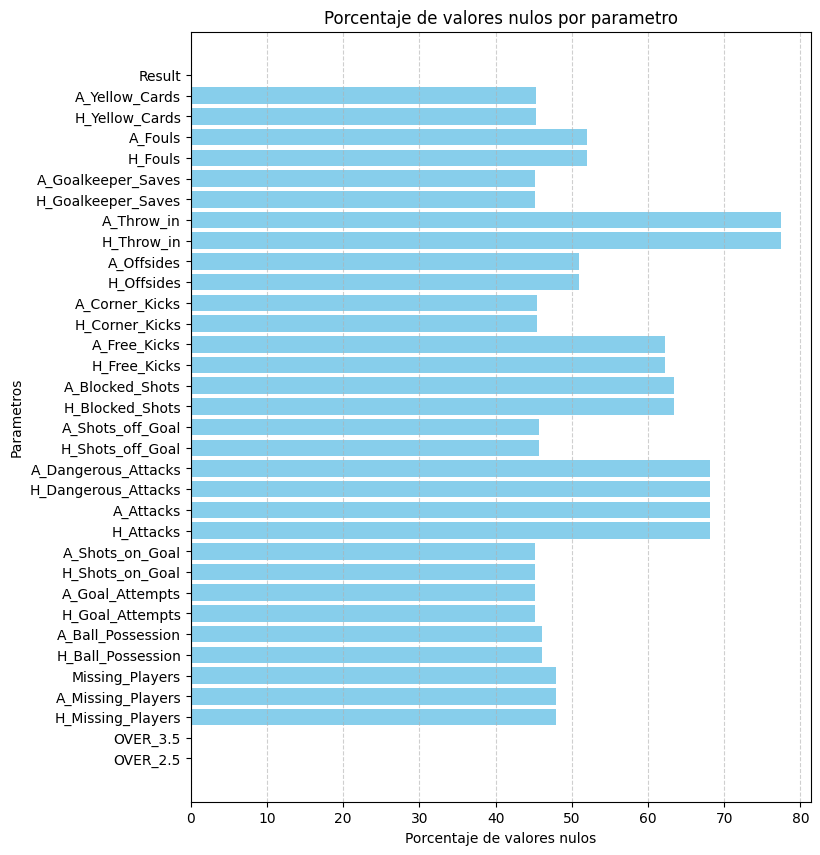

In [5]:
porcentaje_nan = df.isna().mean() * 100

plt.figure(figsize=(8, 10))
plt.barh(porcentaje_nan.index, porcentaje_nan, color='skyblue')
plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Parametros')
plt.title('Porcentaje de valores nulos por parametro')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Como vemos en el grafico, tenemo un porcentaje alto de valores nulos en todos los parametros predictores relacionados con metricas estadisticas del juego, con la excepcion de las metricas $\textit{OVER\_2.5}$ y $\textit{OVER\_3.5}$ que provienen de la rama de metricas relacionadas con apuestas. Por suerte, El resto de variables no contienen valores nulos, y por lo tanto, disponemos de todas las etiquetas. 

Para empezar, eliminaremos los partidos que tengan mas de un 30% de valores nulos. Con suerte, conseguiremos que el numero de valores nulos disminuya considerablemente.

Dimensiones de nuestro conjunto de datos antes del filtrado: (96337, 34)
Dimensiones de nuestro conjunto de datos tras filtrado: (51347, 34)


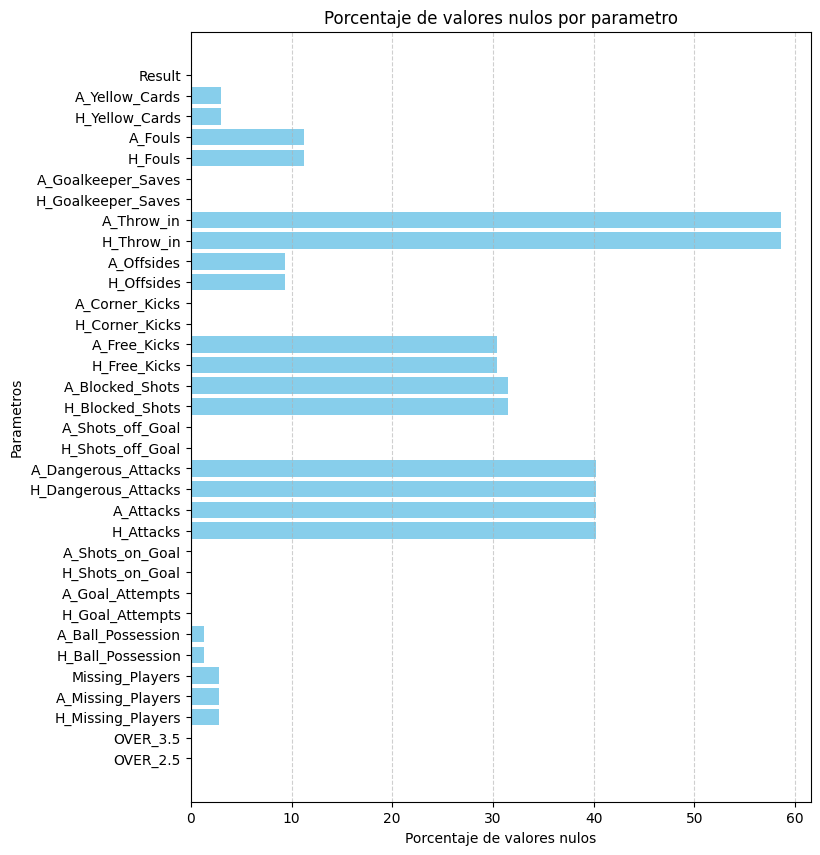

In [6]:
umbral = int(df.shape[1] * 0.7) 
df_filtered_1 = df.dropna(thresh=umbral)
print(f'Dimensiones de nuestro conjunto de datos antes del filtrado: {df.shape}')
print(f'Dimensiones de nuestro conjunto de datos tras filtrado: {df_filtered_1.shape}')
porcentaje_nan = df_filtered_1.isna().mean() * 100

plt.figure(figsize=(8, 10))
plt.barh(porcentaje_nan.index, porcentaje_nan, color='skyblue')
plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Parametros')
plt.title('Porcentaje de valores nulos por parametro')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Como vemos, hemos perdido casi la mitad de nuestros datos, pero era algo necesario debido al alto volumen de datos nulos. Aun asi, seguimos teniendo bastantes datos vacios en nuesto dataset.

Destacan notablemente 10 columnas en las que el numero de valores nulos supera el 30% del total. En este caso, nos decantamos con eliminar estas columnas.

In [7]:
columnas_a_eliminar = ['A_Throw_in', 'H_Throw_in', 'A_Free_Kicks', 'H_Free_Kicks', 'A_Blocked_Shots', 'H_Blocked_Shots', 'A_Dangerous_Attacks', 'H_Dangerous_Attacks', 'A_Attacks', 'H_Attacks']
df_filtered_2 = df_filtered_1.drop(columns=columnas_a_eliminar)

Finalmente, para el resto de variables, reemplazamos los valores nulos por los valores medios de cada parametro. En este caso, utilizaremos las medias estratificadas de cada variable, calculadas por clase.



In [8]:
df_filtered_2['OVER_2.5'] = df_filtered_2['OVER_2.5'].astype(float) #Cambio columna de valores Booleanos a valores binarios
df_filtered_2['OVER_3.5'] = df_filtered_2['OVER_3.5'].astype(float) #Cambio columna de valores Booleanos a valores binarios
df_filtered_2['A_Ball_Possession'] = df_filtered_2['A_Ball_Possession'].replace('%', '', regex=True).astype(float)/100 #Convierto en valores numericos los valores de tipo string
df_filtered_2['H_Ball_Possession'] = df_filtered_2['H_Ball_Possession'].replace('%', '', regex=True).astype(float)/100 #Convierto en valores numericos los valores de tipo string


for column in df_filtered_2.select_dtypes(include=[float, int]).columns:
    df_filtered_2[column] = df_filtered_2.groupby('Result')[column].transform(lambda x: x.fillna(x.mean()))


In [9]:
df_filtered_2.isna().mean() * 100

OVER_2.5              0.0
OVER_3.5              0.0
H_Missing_Players     0.0
A_Missing_Players     0.0
Missing_Players       0.0
H_Ball_Possession     0.0
A_Ball_Possession     0.0
H_Goal_Attempts       0.0
A_Goal_Attempts       0.0
H_Shots_on_Goal       0.0
A_Shots_on_Goal       0.0
H_Shots_off_Goal      0.0
A_Shots_off_Goal      0.0
H_Corner_Kicks        0.0
A_Corner_Kicks        0.0
H_Offsides            0.0
A_Offsides            0.0
H_Goalkeeper_Saves    0.0
A_Goalkeeper_Saves    0.0
H_Fouls               0.0
A_Fouls               0.0
H_Yellow_Cards        0.0
A_Yellow_Cards        0.0
Result                0.0
dtype: float64

Una vez tenemos los datos totalmente completos, debemos de valorar la estandarizacion. En el caso de que los parametros predictores sean de diferente escala, es muy posible que los de escala mayor tomen una mayor importancia en nuestro modelo, mientras que aquellos predictores con escala menor no tendran apenas impacto en el analisis. Para evitarlo, a cada variable, se le resta su media y divide por la desviacion estandar, obteniendo variables con media 0 y desviación 1. Veamos si en nuestro caso es necesario.

In [10]:
df_filtered_2.shape

(51347, 24)

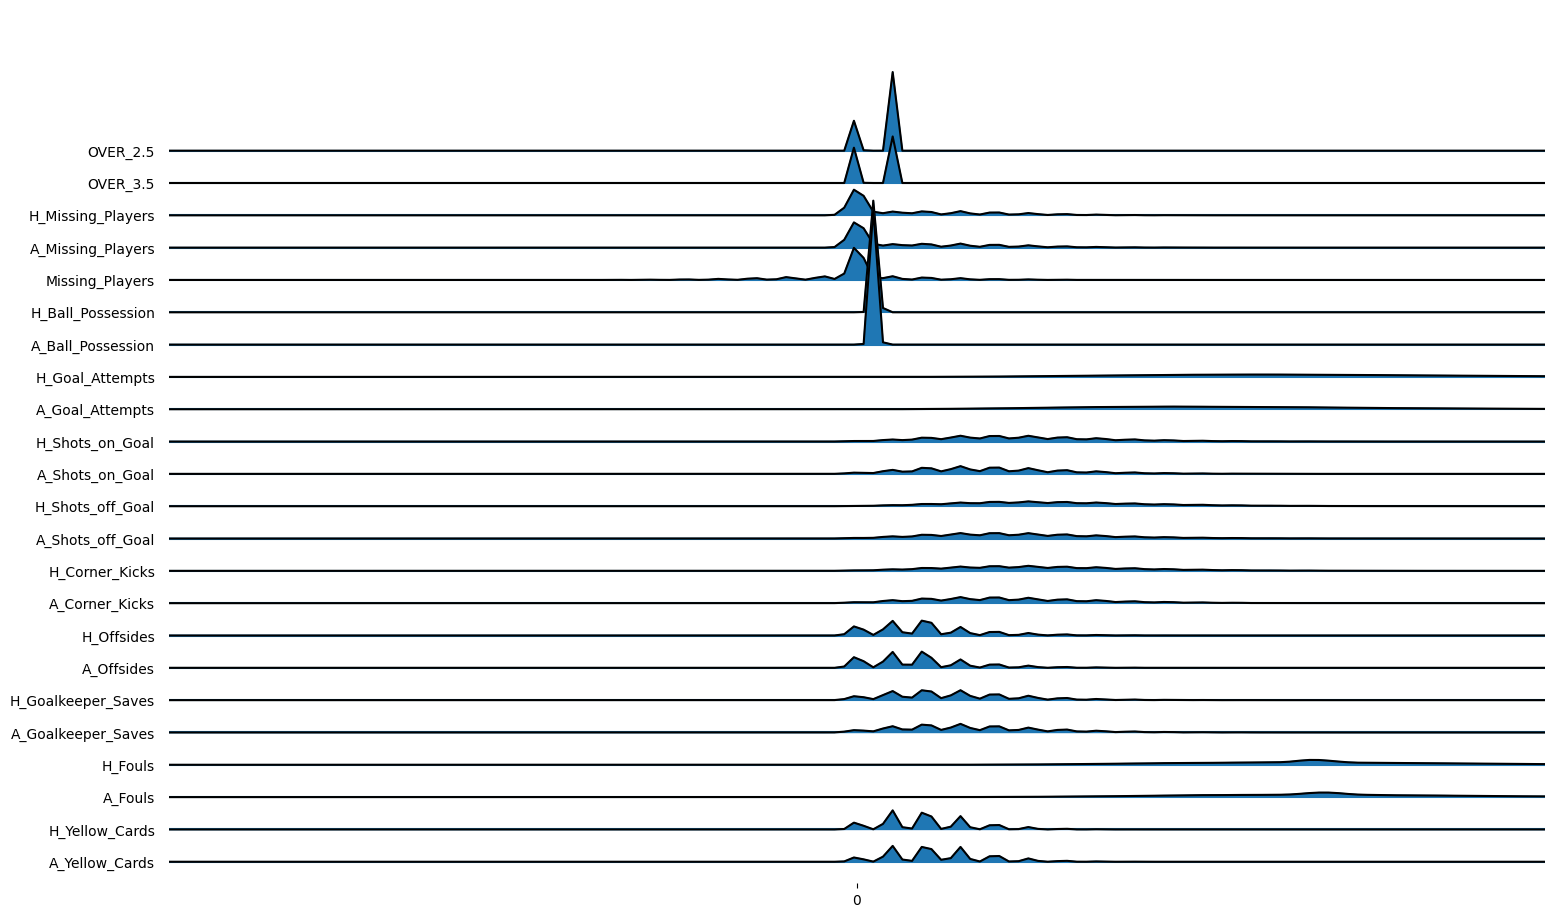

In [11]:
fig, ax = joypy.joyplot(df_filtered_2)
for i in range(len(ax)):
    ax[i].set_xlim(-20, 20)
fig.set_size_inches(20, 10)


Como vemos, hay mucha diferencia entre las distribuciones de los distintos parametros predictores, por lo que nos decantamos con normalizar las variables de nuestro dataset.

Sin embargo, tambien podemos apreciar en las distribuciones de nuestras variables predictoras que muchas de ellas tienen distribuciones con varios maximos y minimos locales. Esto se debe posiblemente a que se trata de variables enteras, discretas. Por ello, antes de estandarizar los datos, vamos a realizar una transformacion Box-Cox con el objetivo de aproximar estas distribuciones a distribuciones normales, minimizando la perdida de varianza.

Como el algoritmo original de Box-cox no es aplicable a datos no estrictamente positivos, aplicaremos la transformacion de Yeo Jonhson. Esta transformacion es una generalizacion de la anterior para valores reales, y sigue la siguiente definicion:

Para valores $ y \geq 0 $:
$$
T(y; \lambda) =
\begin{cases} 
\frac{(y + 1)^\lambda - 1}{\lambda}, & \text{si } \lambda \neq 0, \\ 
\ln(y + 1), & \text{si } \lambda = 0.
\end{cases}
$$

Para valores $ y < 0 $:
$$
T(y; \lambda) =
\begin{cases} 
\frac{-((-y + 1)^{2 - \lambda} - 1)}{2 - \lambda}, & \text{si } \lambda \neq 2, \\ 
-\ln(-y + 1), & \text{si } \lambda = 2.
\end{cases}
$$

Este parametro $\lambda$ sera ajustado automaticamente por la funcion implementada.


In [12]:
from sklearn.preprocessing import PowerTransformer

# Supongamos que 'df_numeric' contiene tus datos numéricos
df_numeric = df_filtered_2.select_dtypes(include=['float64', 'int64'])
df_no_numeric = df_filtered_2.drop(columns = df_numeric.columns)
# Crear el objeto PowerTransformer con Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Ajustar y transformar los datos
df_transformed = pt.fit_transform(df_numeric)

# Convertir el resultado en un DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=df_numeric.columns)

# Ahora 'df_transformed' contiene los datos transformados
df_transformed = df_transformed.reset_index(drop=True)
df_no_numeric = df_no_numeric.reset_index(drop=True)
df_filtered_3 = pd.concat([df_transformed, df_no_numeric], axis=1)


Finalmente, normalizamos las variables predictoras

In [13]:
numeric_columns = df_filtered_3.select_dtypes(include=[float, int]).columns
df_filtered_3[numeric_columns] = (df_filtered_3[numeric_columns] - df_filtered_3[numeric_columns].mean()) / df_filtered_3[numeric_columns].std()

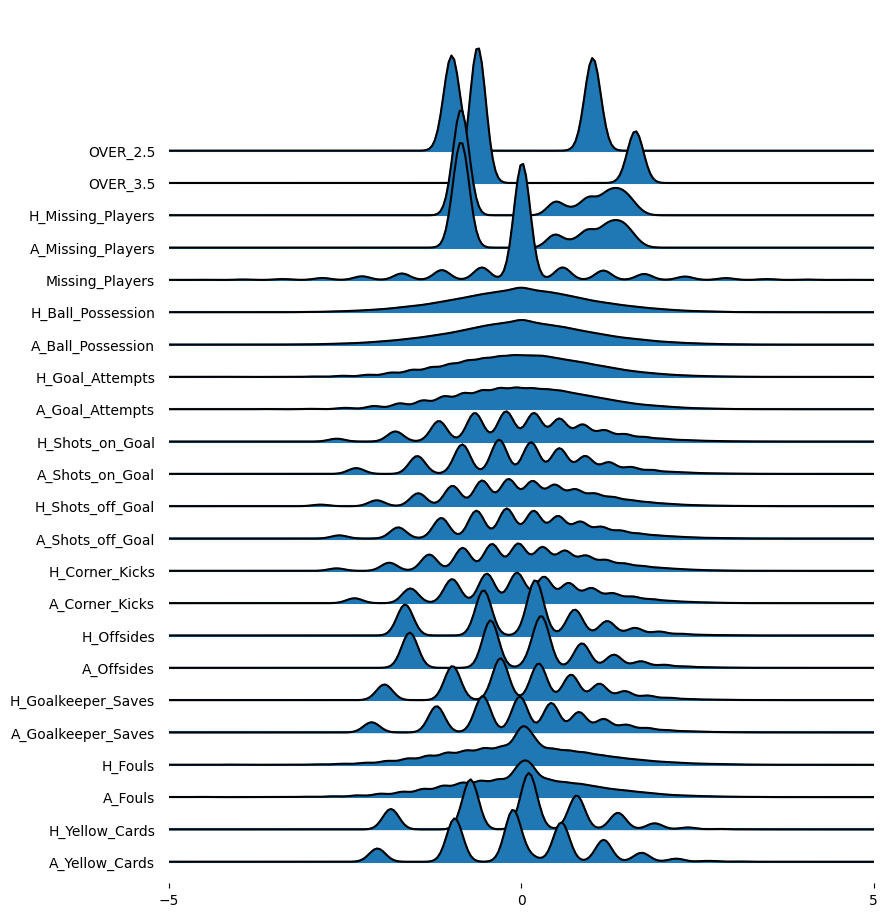

In [14]:
fig, ax = joypy.joyplot(df_filtered_3)
for i in range(len(ax)):
    ax[i].set_xlim(-5, 5)
fig.set_size_inches(10, 10)

El siguiente paso en nuestro analisis sera ver si las clases de nuestro parametro etiqueta estan bien balanceadas, es decir, si el numero de instancias no varia en exceso entre las diferentes clases. En nuestro caso, al tratarse de resultados de partidos de futbol, podemos predecir un pequeño desbalanceo a favor de las victorias de equipos locales, pero no deberia ser desproporcionado. Comprobemoslo.

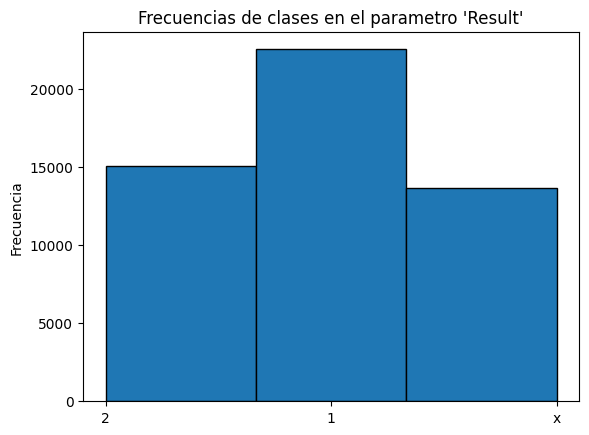

In [15]:
plt.hist(df_filtered_3['Result'], bins=3, edgecolor='black')
plt.title("Frecuencias de clases en el parametro 'Result'")
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

Como vemos en el histograma, y tal y como habiamos predicho, existe una pequeñena descompesancion en el numero de instancias segun el resultado del partido. Sin embargo, esta diferencia no es ni mucho menos excesiva, y por lo tanto, no es necesario a plicar tecnicas de resampleo para generar datos de las clases minoritarias.

A continuacion, vamos a analizar la informacion que nos aportan las diferentes variables predictoras de nuestro dataset. Como es bien sabido, una alta dimensionalidad de los datos puede suponer un problema a la hora de obtener resultados, sobre todo al trabajar con algoritmos de Machine Learning clasicos. Por ello, vamos a estudiar cuanta informacion nos proporcionan las distintas variables, y asi poder eliminar parametros poco utiles si los hubiera.

Empecemos viendo la matriz de correlaciones de las varibles predictoras.

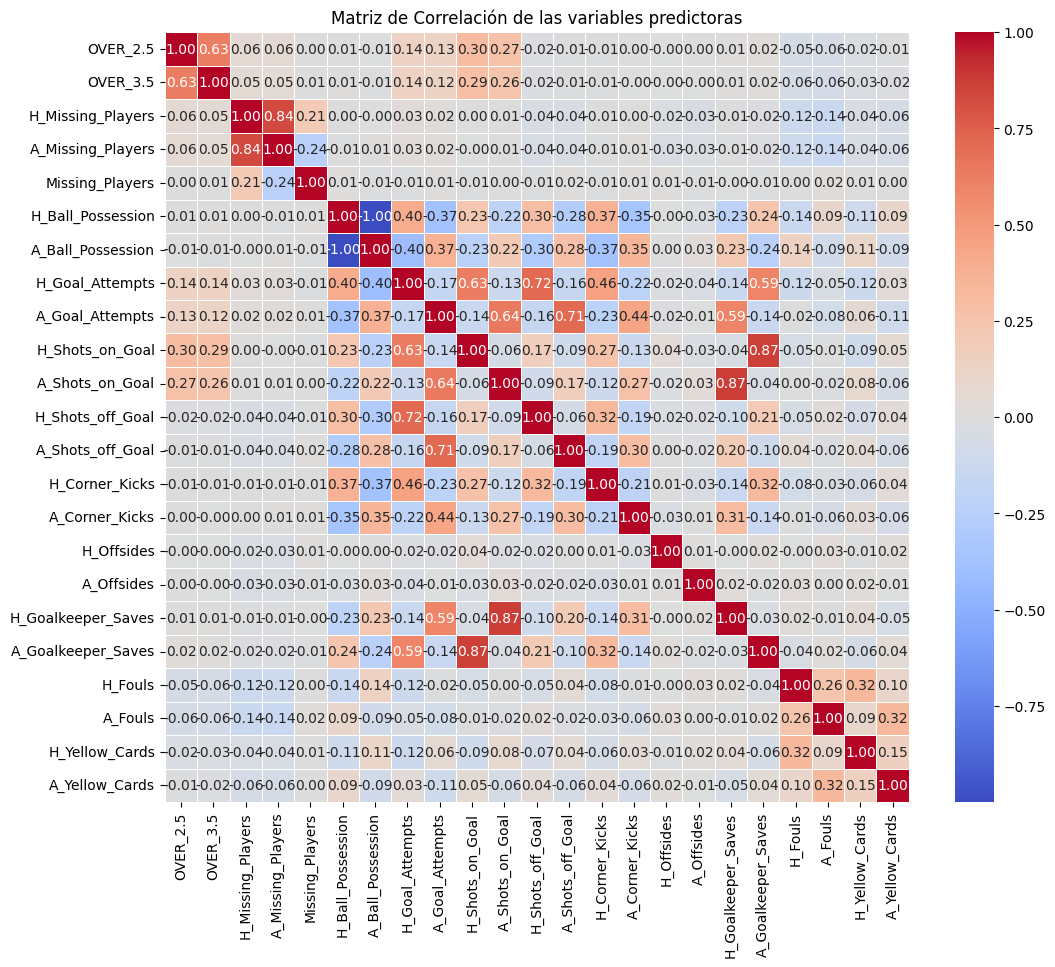

In [16]:
df_pred = df_filtered_3.drop(columns=['Result'])

# Calcular la matriz de correlaciones
corr_matrix = df_pred.corr()

# Graficar la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación de las variables predictoras')
plt.show()

Como podemos observar, hay correlaciones de todo tipo entre las variables predictoras.

Lo primero que nos llama la atencion son los valores de $\textit{Corr(H\_Ball\_Possession, A\_Ball\_Possession) = -1}$. Como es logico, son valores cuya suma debe de ser igual a 100 (antes de normalizar), por lo que el valor de uno de los parametros determina univocamente el del segundo. Por ello, eliminamos uno de los valores, en este caso $\textit{A\_Ball\_Possession}$.

Por otro lado, tenemos dos paares de correlaciones muy altas $\textit{Corr(H\_Goalkeeper\_Saves, A\_shots\_on\_Goal) = Corr(A\_Goalkeeper\_Saves, H\_shots\_on\_Goal) = 0.88}$. En este caso, es claro que el numero de paradas de un portero esta directamente relacionado con el numero de disparos a puerta del equipo contrario. Es más, en este caso, cabe la posibilidad de que los modelos clasificadores tomen estas dos variables para calcular el numero de goles que ha anotado cada equipo y asi determinar el resultado del partido. Como esto no es algo que nos interese en este estudio, ya que no no saportaria ningun valor, optamos por eliminar las variables $\textit{H\_Goalkeeper\_Saves}$ y  $\textit{A\_Goalkeeper\_Saves}$.

Con lo que respecta a las demas correlaciones, considero que no son lo suicientemente altas (en valor absoluto) para considerar el eliminar más variables.

In [17]:
df_filtered_3 = df_filtered_3.drop(columns = ['A_Ball_Possession', 'H_Goalkeeper_Saves', 'A_Goalkeeper_Saves'])

Tras eliminar estas variables altamente correlacionadas con otras variables predictoras, vamos a ver si podemos expresar la informacion de nuestros datos con un menor numero de variables. 

Para ello, vamos a aplicar la tecnica del análisis de componentes principales. Esta se basa en proyectar los datos multidimensionales sobra la direccion que maximiza su varianza. Esta proyeccion de los datos será la primera componente principal. A continuación, y de manera repetida, se vuelven a proyectar los datos sobre una direccion ortogonal a las anteriores componentes principales, nuevamente maximizando la varianza de los datos. De esta forma. logramos capturar lla informacion (la variabilidad) de nuestros datos en el menor numero de dimensiones posibles. 

Apliquemos esta tecnica a nuestros datos.

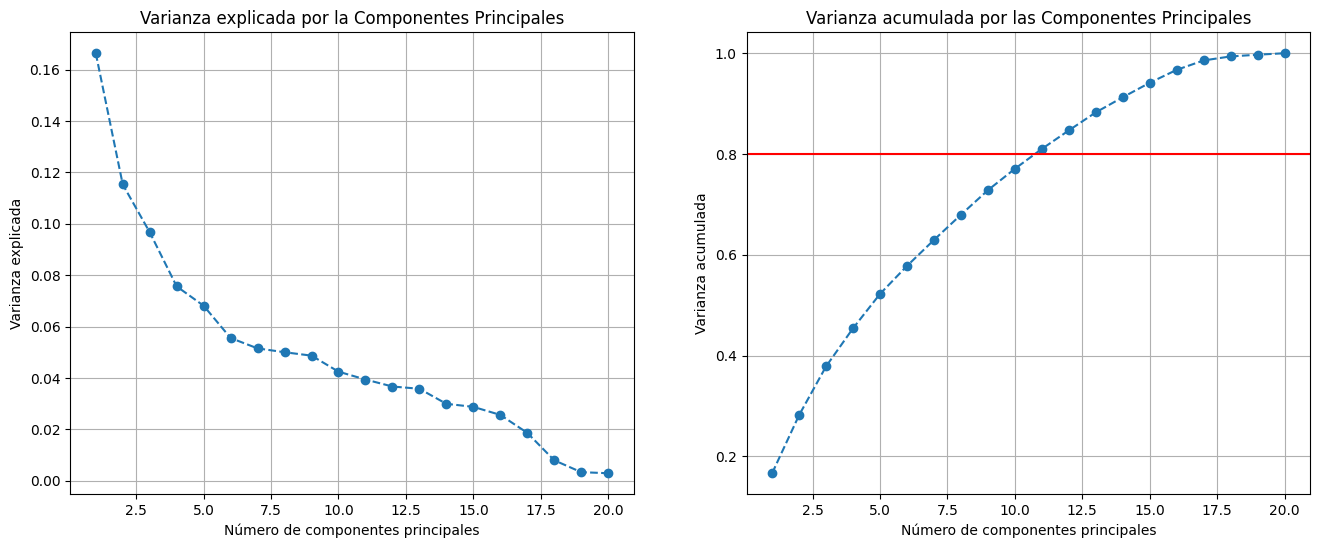

In [18]:
df_pred = df_filtered_3.drop(columns=['Result'])
pca = PCA()
pca_result = pca.fit_transform(df_pred)

# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Gráfico del codo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
axes[0].set_title('Varianza explicada por la Componentes Principales')
axes[0].set_xlabel('Número de componentes principales')
axes[0].set_ylabel('Varianza explicada')
axes[0].grid(True)

axes[1].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_cumulative, marker='o', linestyle='--')
axes[1].set_title('Varianza acumulada por las Componentes Principales')
axes[1].set_xlabel('Número de componentes principales')
axes[1].set_ylabel('Varianza acumulada')
axes[1].grid(True)
axes[1].axhline(0.8, color='red')

plt.show()

Como se puede observar en los gráficos mostrados, no es posible reducir significativamente la dimensionalidad de nuestros datos sin perder informacion. Para preservar un 80% de varianza, debemos de trabajar con las primeras 11 componentes principales. Ademas, el transformar nuestros datos de esta manera dificulta la posterior interpretabilidad de los modelos, lo cual es vital para los objetivos de este analisis. Por ello, partiremos con las variables predictoras en crudo, y de no tener exito, probaremos posteriormente con dichas componentes principales.

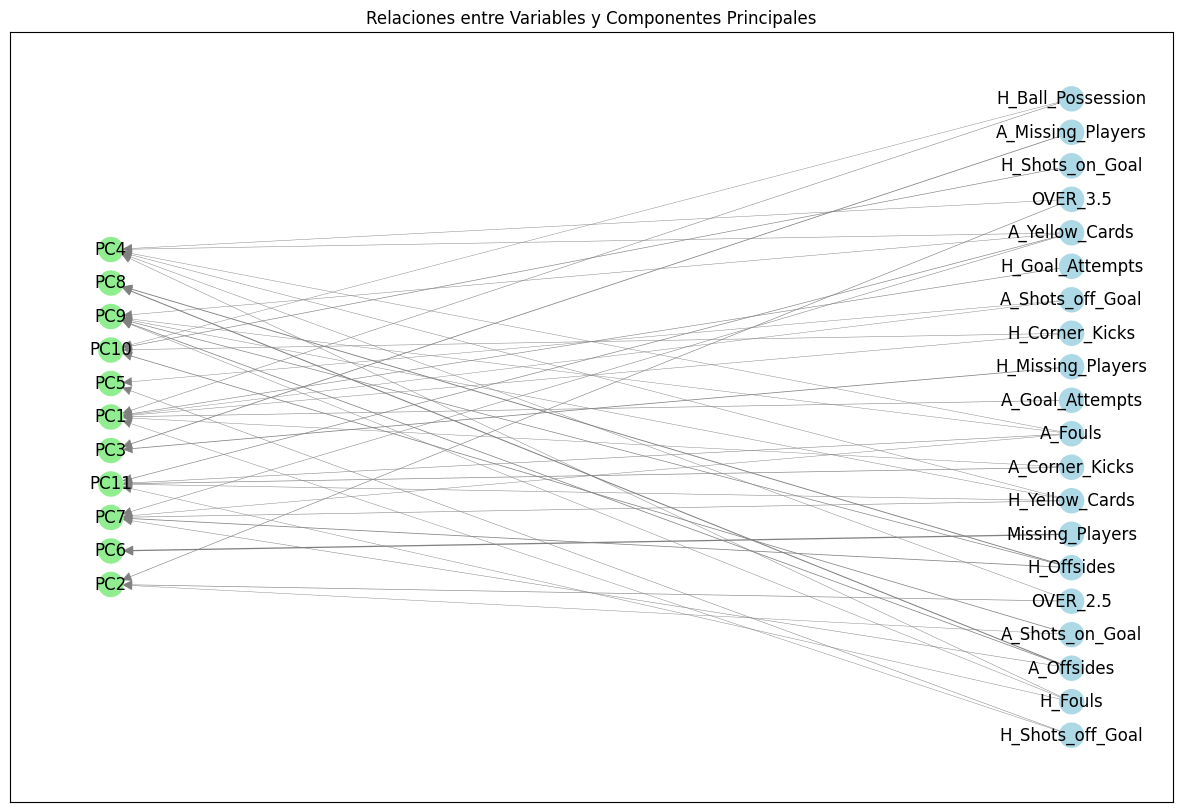

In [19]:
import networkx as nx
components_df = pd.DataFrame(pca.components_, columns=df_pred.columns)

# Crear un grafo
G = nx.DiGraph()

# Agregar nodos para las variables originales
variables = df_pred.columns
for var in variables:
    G.add_node(var, group='Variable')

# Agregar nodos para los componentes principales
components = [f'PC{i+1}' for i in range(components_df.shape[0])][:11]
for comp in components:
    G.add_node(comp, group='Componente')

# Agregar conexiones entre variables y componentes principales
for i, comp in enumerate(components):
    for var in variables:
        weight = components_df.loc[i, var]
        if abs(weight) > 0.3:  # Umbral para incluir solo relaciones significativas
            G.add_edge(var, comp, weight=weight)

# Dibujar el grafo
pos = nx.multipartite_layout(G, subset_key="group")  # Distribuir nodos en columnas
edge_weights = [abs(G[u][v]['weight']) for u, v in G.edges()]  # Pesos de las flechas

plt.figure(figsize=(15, 10))
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    node_color=['lightblue' if G.nodes[node]['group'] == 'Variable' else 'lightgreen' for node in G],
    edge_color='gray',
    width=edge_weights,  # Grosor proporcional al peso
    arrowsize=15,
)
plt.title('Relaciones entre Variables y Componentes Principales')
plt.show()

Como podemos observar en el grafico anterior, la interpretabilidad de las componentes puede suponer un problema en este caso. 

Por ejemplo, podemos ver que las varibles predictoras con mas peso en la primera componente principal son: $\textit{A\_Corner\_kicks}$, $\textit{H\_Corner\_kicks}$, $\textit{H\_Ball\_Possession}$, $\textit{H\_Goal\_Attemps}$, $\textit{A\_Goal\_Attemps}$ y $\textit{H\_Shots\_off\_Goal}$, lo cual no nos da una idea general de lo que interpreta dicha componente. 

## Outlier detection

Otro de las cuestiones a trabajar antes de aplicar cualquier tipo de modelo es la deteccion de outliers. Los outliers son datos que estan alejados del resto, fuera de lo que llamamos $\textit{Nube de puntos}$ formada por las instancias del dataset. Hay muchas formas de definir lo que es $\textit{estar lejos del resto}$, ya que depende de la distancia empleada y de como se mide dicha distancia entre un punto y un conjunto de puntos. 

En este caso, comenzaremos por un algoritmo sencillo, el llamado $\textit{Local Outlier Factor (LOF)}$. Este considera las distancias euclideas entre cada punto y sus k vecinos mas proximos, y en funcion a estas distancias asigna un valor de outlierness. De esta forma, las instancias con valor de outlierness mayor a un umbral previamente fijado seran consideradas outliers.

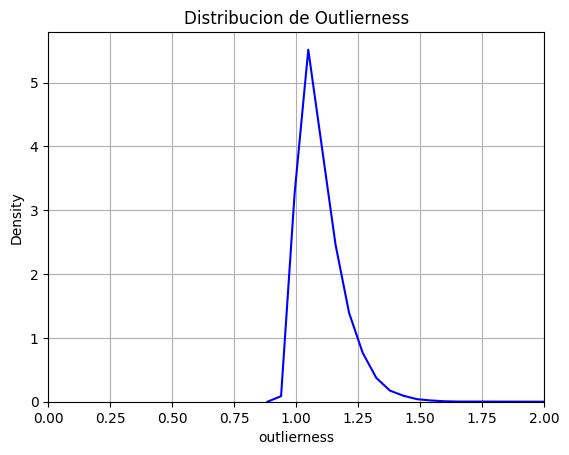

Numero de puntos con outlierness superior a 2:8.
Numero de puntos con outlierness superior a 1.5:122.


In [20]:
from sklearn.neighbors import LocalOutlierFactor
import plotly.express as px

np.random.seed(42)
clf = LocalOutlierFactor(n_neighbors=5)

clf.fit_predict(df_pred) 
outlierness = clf.negative_outlier_factor_
df_pred["outlierness"] = abs(outlierness)

sns.kdeplot(df_pred["outlierness"], color="blue", fill=False)

plt.title("Distribucion de Outlierness")
plt.xlim(0,2)
plt.xlabel("outlierness")
plt.ylabel("Density")
plt.grid()
plt.show()

print(f'Numero de puntos con outlierness superior a 2:{len(df_pred[df_pred["outlierness"]>2])}.')
print(f'Numero de puntos con outlierness superior a 1.5:{len(df_pred[df_pred["outlierness"]>1.5])}.')

En este caso, no parece haber escesivos puntos outliers. Podemos ver que de mas de 50.000 datos, solo 3 superan el valor de outlierness = 2. En este caso, dado que tenemos una gran cantidad de datos, probamos con un valor de outlierness de 1.5, y de esta forma, obtenemos 118 puntos outlier.

Veamos a continuacion que puntos hemos detectado como outliers. En este caso, dada la alta dimesionalidad de los datos y lo dividida que esta la varianza entre las variables predictoras, no será tarea simple visualizar estos outliers y ver el porque se han detectado. Probemos con la tecnica de $\textit{t-distributed Stochastic Neighbor Embedding (TSNE)}$.

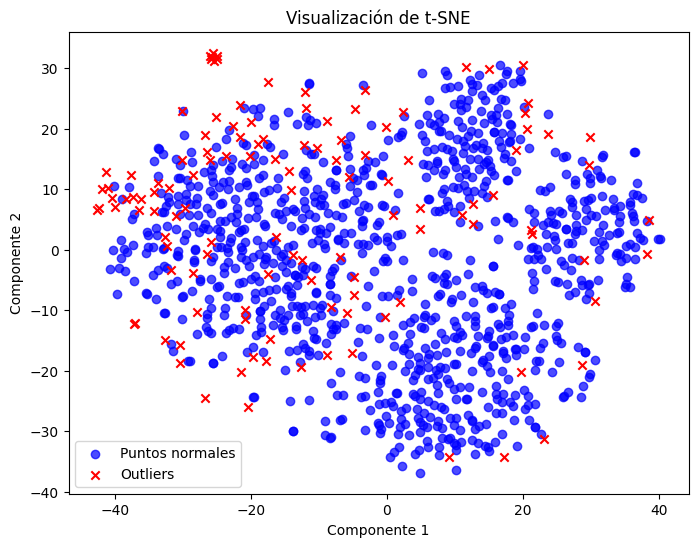

In [21]:
from sklearn.manifold import TSNE

df_pred = df_pred.reset_index(drop=True)
df_filtered_3 = df_filtered_3.reset_index(drop=True)
df_pred_complete = pd.concat([df_pred, df_filtered_3['Result']], axis=1)

#Vamos a hacer uso de una muestra reducida de los datos para este proceso, ya que debido al alto volumen, el algoritmo TSNE es lento y los resultados no son muy visuales.
outliers = df_pred_complete[df_pred_complete['outlierness'] > 1.5]
not_outliers = df_pred_complete[df_pred_complete['outlierness'] <= 1.5]
sample_df = not_outliers.sample(n=1000, replace=True, random_state=42)
sample_df = pd.concat([sample_df, outliers], ignore_index=True)
outliers = sample_df['outlierness'] > 1.5
result = sample_df['Result']
sample_df = sample_df.drop(columns=['outlierness', 'Result'])

# Configurar t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

# Reducir la dimensionalidad
data_tsne = tsne.fit_transform(sample_df)

# Visualizar los resultados
plt.figure(figsize=(8, 6))

# Puntos normales
plt.scatter(data_tsne[~outliers, 0], data_tsne[~outliers, 1], c='blue', alpha=0.7, label='Puntos normales')

# Puntos con 'outlierness' > 1.5 (marcados con 'X')
plt.scatter(data_tsne[outliers, 0], data_tsne[outliers, 1], c='red', marker='x', label='Outliers')

# Añadir etiquetas
plt.title("Visualización de t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()

# Mostrar el gráfico
plt.show()

In [22]:
df_filtered_3 = df_filtered_3[df_pred["outlierness"]<1.5]

Como predeciamos, el TSNE no es capaz de mostrar la mayor parte de la informacion que contienen nuestro datos, y por lo tanto, no podemos ver realmente si los puntos marcados como outliers estan realmente distanciados o no del resto.

Sin embargo, a pesar de todo si que podemos intuir como hay una mayor densidad de puntos outliers en la zona exterior de la denominada nube de puntos, especialmente en los valores mas negativos de la primera componente. Aun así, por la naturaleza de nuestros datos, es muy complicado asegurar que realmente los outliers son puntos que realmente queremos eliminar.

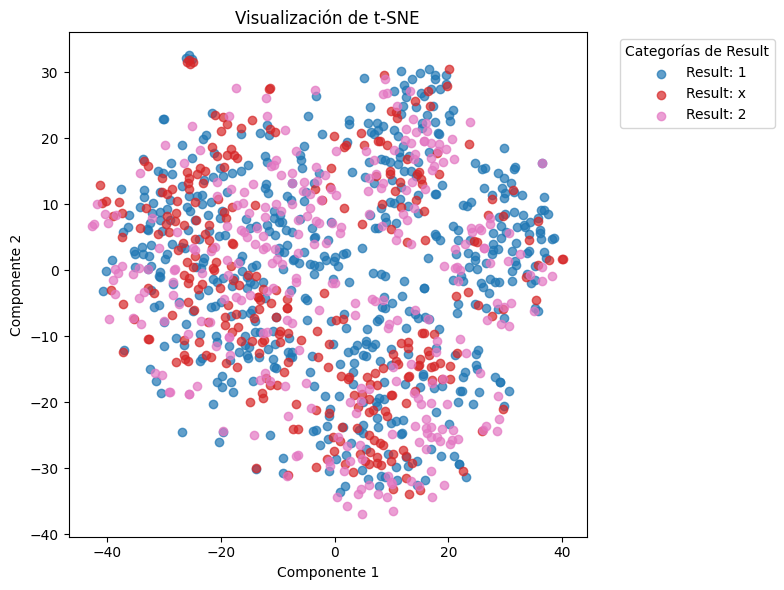

In [23]:
# Configurar t-SNE


# Crear un mapa de colores para los valores únicos de 'Result'
unique_results = result.unique()
color_map = {result: plt.cm.tab10(i / len(unique_results)) for i, result in enumerate(unique_results)}

sample_df = sample_df.reset_index(drop=True)
result = result.reset_index(drop=True)
sample_df = pd.concat([sample_df, result], axis=1)
# Visualizar los resultados
plt.figure(figsize=(8, 6))

# Dibujar cada grupo con un color distinto
for result in unique_results:
    mask = sample_df['Result'] == result
    plt.scatter(
        data_tsne[mask, 0], 
        data_tsne[mask, 1], 
        color=color_map[result],  # Color específico del grupo
        label=f'Result: {result}', 
        alpha=0.7
    )

# Añadir etiquetas
plt.title("Visualización de t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend(title="Categorías de Result", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Haciendo uso de la proyeccion realizada mediante el TSNE, visualizamos los datos segun su valor en la variable etiqueta. Como vemos, esta representación no nos ayuda para distinguir grupos, seguramente debido al bajo porcentaje de variabilidad que recoje. 

Finalmente, como ultimo paso y previo a la aplicacion de modelos de clasificacion sobre nuestros datos, vamos a aplicar alguna tecnica de seleccion de variables con el fin de reducir, si es conveniente, la dimension de los datos.

Como primera tentativa, no podemos aplicar un $\textit{filter correlation by t-test}$, ya que este solo es apto para problemas de clasificacion binaria. En nuestro caso, probamos con un analisis de varianza ( $\textit{ANOVA test}$ ). Sin embargo, este test requiere normalidad en nuestros datos, no solo para cada variable predictora, sino para cada variable dentro de cada grupo $\textit{1}$, $\textit{x}$ y $\textit{2}$. Veamos si nuestros datos cumplen estas hipotesis.

Para ello, aplicamos un test de normalidad por cada grupo dentro de cada variable predictora. Por ejemplo, haciendo uso del test de Sahpiro-Wilk:

- **Hipótesis nula (\(H_0\))**: Los datos siguen una distribución normal.
- **Hipótesis alternativa (\(H_1\))**: Los datos no siguen una distribución normal.


In [24]:
from scipy.stats import shapiro

X = df_filtered_3.drop(columns="Result")
y = df_filtered_3["Result"]

for column in X.columns:
    print(f"Feature: {column}")
    for label in ['1', 'x', '2']:
        values = X.loc[y == label, column]
        
        # Prueba de Shapiro-Wilk
        stat, p_value = shapiro(values)
        print(f"  Class {label} - p-value: {p_value}")
        
        if p_value >= 0.05:
            print(f"    -> Class {label} seems to follow a normal distribution.")
        else:
            print(f"    -> Class {label} does NOT follow a normal distribution.")
            
    print()

Feature: OVER_2.5
  Class 1 - p-value: 8.4710950477233e-112
    -> Class 1 does NOT follow a normal distribution.
  Class x - p-value: 1.6264200148652355e-104
    -> Class x does NOT follow a normal distribution.
  Class 2 - p-value: 4.7859725441993674e-101
    -> Class 2 does NOT follow a normal distribution.

Feature: OVER_3.5
  Class 1 - p-value: 4.481283774560281e-115
    -> Class 1 does NOT follow a normal distribution.
  Class x - p-value: 1.7211905755018205e-104
    -> Class x does NOT follow a normal distribution.
  Class 2 - p-value: 4.035419033693962e-105
    -> Class 2 does NOT follow a normal distribution.

Feature: H_Missing_Players
  Class 1 - p-value: 2.3044948356775266e-103
    -> Class 1 does NOT follow a normal distribution.
  Class x - p-value: 2.4128967664295352e-92
    -> Class x does NOT follow a normal distribution.
  Class 2 - p-value: 6.301154743352333e-93
    -> Class 2 does NOT follow a normal distribution.

Feature: A_Missing_Players
  Class 1 - p-value: 1.7

C:\Users\irait\AppData\Local\Temp\ipykernel_13044\2036303434.py:12: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22508.
  stat, p_value = shapiro(values)
C:\Users\irait\AppData\Local\Temp\ipykernel_13044\2036303434.py:12: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13651.
  stat, p_value = shapiro(values)
C:\Users\irait\AppData\Local\Temp\ipykernel_13044\2036303434.py:12: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15066.
  stat, p_value = shapiro(values)


  Class 1 - p-value: 3.580757875605129e-38
    -> Class 1 does NOT follow a normal distribution.
  Class x - p-value: 1.5271742769696567e-31
    -> Class x does NOT follow a normal distribution.
  Class 2 - p-value: 3.253458479187354e-31
    -> Class 2 does NOT follow a normal distribution.

Feature: H_Yellow_Cards
  Class 1 - p-value: 1.7287632442986245e-70
    -> Class 1 does NOT follow a normal distribution.
  Class x - p-value: 1.0204479328280953e-58
    -> Class x does NOT follow a normal distribution.
  Class 2 - p-value: 1.9847582413905013e-59
    -> Class 2 does NOT follow a normal distribution.

Feature: A_Yellow_Cards
  Class 1 - p-value: 5.184864172752719e-65
    -> Class 1 does NOT follow a normal distribution.
  Class x - p-value: 5.945096682854882e-55
    -> Class x does NOT follow a normal distribution.
  Class 2 - p-value: 2.826912099878386e-58
    -> Class 2 does NOT follow a normal distribution.



Como vemos, no podemos asumir normalidad en nuestros datos, por lo qu no podemos aplicar el test de ANOVA. En su lugar, aplicamos el test de Kruskal-Wallis.
Este test comprueba si cada variable predictora difiere en su distribucion para cada grupo de la variable etiqueta. En el caso de no diferir, esta variable sera poco util a la hora de aplicar un modelo clasificador. Por el contrario, si la distribucion de esta variable cambia significativamente segun cambia el valor de la variable etiqueta, esta variable sera de gran valor a la hora de establecer el modelo final. 


$$
H_0: \text{Distribución}_1 = \text{Distribución}_x = \text{Distribución}_2
$$

$$
H_1: \exists \, i, j \in \{1, x, 2 \} \text{ tal que} \; \text{Distribución}_i \neq \text{Distribución}_j
$$

In [25]:
from scipy.stats import kruskal


significant_features = []
p_value_threshold = 0.05 

for column in X.columns:
    # Separar valores para cada clase
    class_1_values = X.loc[y == '1', column]
    class_x_values = X.loc[y == 'x', column]
    class_2_values = X.loc[y == '2', column]
    
    # Realizar test kruskal
    t_stat, p_value = kruskal(class_1_values, class_x_values, class_2_values)
    print(f"Feature: {column}, p-value: {p_value}")
    
    # Seleccionar si p-valor es menor al umbral
    if p_value < p_value_threshold:
        significant_features.append(column)

Feature: OVER_2.5, p-value: 0.0
Feature: OVER_3.5, p-value: 5.49448616357553e-39
Feature: H_Missing_Players, p-value: 5.438364178862826e-14
Feature: A_Missing_Players, p-value: 9.492421823890057e-16
Feature: Missing_Players, p-value: 0.33751146873017573
Feature: H_Ball_Possession, p-value: 0.0006089257006365668
Feature: H_Goal_Attempts, p-value: 2.945063319309058e-240
Feature: A_Goal_Attempts, p-value: 0.0
Feature: H_Shots_on_Goal, p-value: 0.0
Feature: A_Shots_on_Goal, p-value: 0.0
Feature: H_Shots_off_Goal, p-value: 6.8038662580837454e-18
Feature: A_Shots_off_Goal, p-value: 0.0021208628577805504
Feature: H_Corner_Kicks, p-value: 4.511451673682282e-16
Feature: A_Corner_Kicks, p-value: 0.8286732538472474
Feature: H_Offsides, p-value: 2.3541248197219893e-86
Feature: A_Offsides, p-value: 1.2096426248466608e-19
Feature: H_Fouls, p-value: 2.8288719434264626e-16
Feature: A_Fouls, p-value: 1.174960875951077e-31
Feature: H_Yellow_Cards, p-value: 9.292849797856982e-137
Feature: A_Yellow_Cards,

Por lo que vemos en los resultados de este analisis, existen dos variables en nuestro dataset que no tienen correlacion significativa con nuestra variable etiqueta: $\textit{Missing\_Players}$ y $\textit{A\_Corner\_Kicks}$. Sin embargo, nos resulta extraño que la variable $\textit{A\_Corner\_Kicks}$ tenga un p-valor tan alto cuando su variable hermana $\textit{H\_Corner\_Kicks}$ tiene un p-valor muy cercano al 0. Por ello, vamos a aplicar una segunda tecnica para comprobar estos resultados.

En este caso, vamos a aplicar el enfoque de $\textit{Correlation Feature Selection}$. El objetivo es seleccionar las variables predictoras mas relavantes dentro de nuestro conjunto de datos, evitando una alta correlacion entre estas variables para no tener informacion redundante. Para ello se hace uso del Heuristico de merito $\textit{Merit}$

$$
Merit(S) = \frac{k \cdot \overline{r_c}}{\sqrt{k + k(k - 1) \overline{r_r}}}
$$

Donde:

- $ k $ es el número de características seleccionadas en el subconjunto $ S $.
- $ \overline{r_c} $ es el promedio de la correlación entre las características de $ S $ y la variable objetivo.
- $ \overline{r_r} $ es el promedio de las correlaciones entre las características dentro de $ S $.

En esta fórmula:

- Un valor alto de $ \overline{r_c} $ indica que las características están fuertemente correlacionadas con la variable dependiente (alta relevancia).
- Un valor bajo de $ \overline{r_r} $ indica que las características no son muy redundantes entre sí (baja redundancia).

In [26]:
from sklearn.feature_selection import mutual_info_classif

# Función para calcular el Merit
def calculate_merit_per_feature(X, y):
    merit_values = {}  # Diccionario para guardar el Merit de cada característica
    n = X.shape[1]  # Número de características
    
    # Calcular la correlación entre características
    correlations_between_features = X.corr().abs()
    
    # Calcular la información mutua de cada característica con la variable target
    mutual_info_values = mutual_info_classif(X, y)  # Información mutua entre cada feature y y
    
    # Calcular el Merit para cada característica
    for i, feature in enumerate(X.columns):
        avg_r_c = mutual_info_values[i]  # Información mutua entre la característica y la variable target
        avg_r_r = correlations_between_features[feature].mean()  # Promedio de correlaciones con otras características
        
        # Cálculo del Merit para esta característica
        merit = (n * avg_r_c) / np.sqrt(n + (n * (n - 1)) * avg_r_r)
        
        merit_values[feature] = merit
    
    return merit_values


# Calcular Merit
merit = calculate_merit_per_feature(X, y)
print(f"Merit: {merit}")


Merit: {'OVER_2.5': 0.13378429822812749, 'OVER_3.5': 0.005590987435425586, 'H_Missing_Players': 0.07197991536088859, 'A_Missing_Players': 0.09245803177362767, 'Missing_Players': 0.09028199992414501, 'H_Ball_Possession': 0.030040224011700124, 'H_Goal_Attempts': 0.02404733562459847, 'A_Goal_Attempts': 0.03026316513708797, 'H_Shots_on_Goal': 0.1600431979573527, 'A_Shots_on_Goal': 0.15713571410843705, 'H_Shots_off_Goal': 0.0, 'A_Shots_off_Goal': 0.0, 'H_Corner_Kicks': 0.005596933249952238, 'A_Corner_Kicks': 0.0, 'H_Offsides': 0.3063500083676606, 'A_Offsides': 0.3032338503649542, 'H_Fouls': 0.29559204702931136, 'A_Fouls': 0.31117081982878997, 'H_Yellow_Cards': 0.08076028645674266, 'A_Yellow_Cards': 0.09276338862971048}


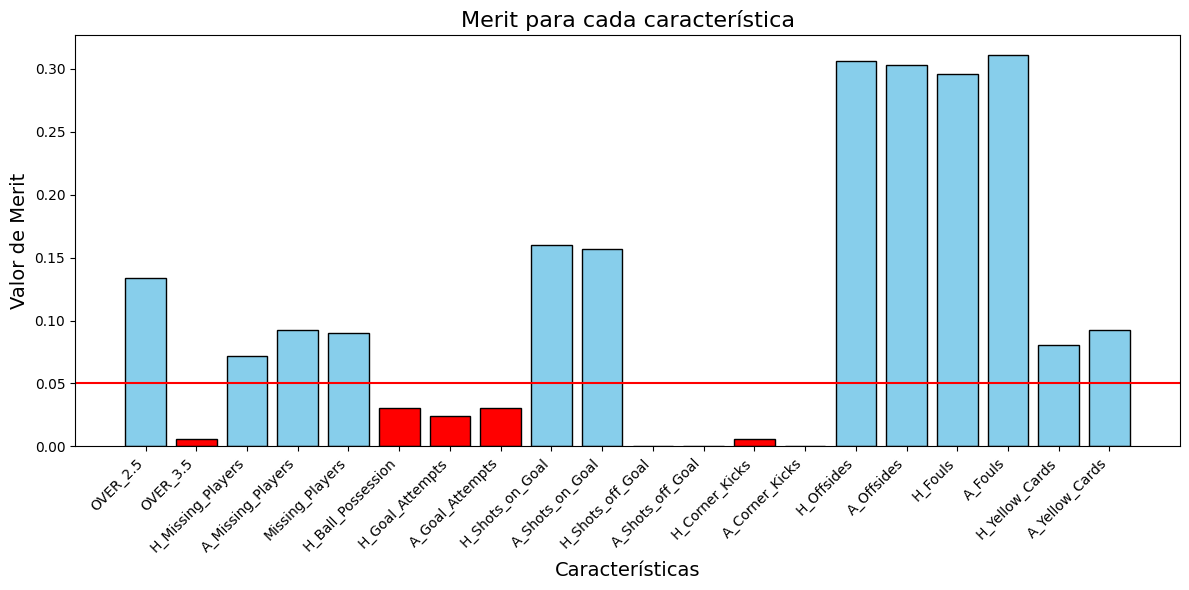

In [27]:
features = list(merit.keys())
merit_values_list = list(merit.values())

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
colors = ['red' if value < 0.05 else 'skyblue' for value in merit_values_list]
plt.bar(features, merit_values_list, color=colors, edgecolor='black')

# Añadir título y etiquetas
plt.title('Merit para cada característica', fontsize=16)
plt.xlabel('Características', fontsize=14)
plt.ylabel('Valor de Merit', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para que se vean mejor
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se sobrepongan
plt.axhline(0.05, color= 'red')

# Mostrar el gráfico
plt.show()

En este caso, podemos establecer un umbral (0.05 por ejemplo), y trabajar unicamente con las variables que obtienen un valor de merito superior a este.

por lo tanto, distintas tecnicas de seleccion de variables dan lugar a distintos subconjuntos de parametros predictores. En lugar de elegir uno u otro, vamos a trabajar con ambos conjuntos, y finalmente, nos quedaremos con el conjunto que mejor rendimiento obtenga a la hora de aplicar los modelos de clasificación.

## Modelo

Hasta ahora nos hemos dedicado a preparar los datos con el proposito de que los modelos sean lo más eficientes posible a la hora de clasificar nuevos datos. Ahora, una vez hemos aplicado todos los filtros y transformaciones que hemos considerado oportunas, vamos a definir nuestros conjuntos de datos para el entrenamiento y testeo de los modelos.

Por un lado, tenemos el conjunto de datos obtenido tras realizar la seleccion de variables mediante test no parametrico de $\textit{Kruskal-Wallis}$. Por otro lado, tenemos un conjunto de datos más reducido, obtenido mediante la tecnica de $\textit{Correlation Feature Selection}$. Vamos a preparar estos conjuntos de datos para la aplicacion de los modelos.

In [28]:
df1 = df_filtered_3.drop(columns = ['Missing_Players', 'A_Corner_Kicks'])
df2 = df_filtered_3.drop(columns = ['OVER_3.5', 'H_Ball_Possession', 'H_Goal_Attempts', 'A_Goal_Attempts', 'H_Shots_off_Goal', 'A_Shots_off_Goal', 'H_Corner_Kicks', 'A_Corner_Kicks'])

A continuacion, debemos decidir como dividir los datos en los conjuntos de train y de test. Para ello, vamos a usar la tecnica de $\textit{k-fold cross validation}$, debido al considerable número de instancias que tenemos. Para esta tecnica, se escoge un número entero k, y se divide el dataset en k subconjuntos del mismo tamaño. Una vez obtenidos los $\textit{k-folds}$, realizamos k entrenamientos del modelo. En cada uno de estos, tomamos uno de los subconjuntos de datos como conjunto de test, y los k-1 restantes como conjunto de train. Finalmente, la media de las metricas de evaluación nos dira si el modelo es adecuado o, si por lo contrario, debemos de ajustar algun hiperparametro o cambiar de arquitectura. En el caso de tener un resultado de evaluación bueno, realizaremos un entrenamiento final con todo el conjunto de datos, y ese será nuestro modelo.

In [ ]:
"""
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Aquí ajustas y evaluas el modelo
"""

En nuestro caso, realizaremos particiones estratificadas de los datos, conservando los porcentajes de cada clase de la variable etiqueta tanto en el conjunto de entrenamiento como en el de test.

Ahora, es hora de escoger los modelos de clasificacion. Empezemos con modelos simples, más faciles de implementar y sobre todo de interpretar, los cuales suelen ser muy utiles para muchos de los problemas de clasificación que se plantean.

Primero, aplicaremos un $\textit{Arbol de Decision}$.

Los arboles de clasificacion son algoritmos que dividen el espacio en distintos fragmentos y a cada uno de estos le asignan, en tareas de clasificacion, una clase de la variable etiqueta. Estos algoritmos tienen estructura de arbol, y segun bajamos en ellos, se va restringiendo el espacio mediante fronteras lineales. Por ejemplo, el primer nodo separa el espacio en dos, dada la condicion V1 < x. Luego, en el segundo nivel del arbol, tendremos dos nodos, cada uno correspondiente al fragmento de espacio delimitado por la condicion del nodo padre. En cada uno de estos nodos se establece una nueva frontera lineal, y por tanto, segun bajamos en el arbol, mayores seran las restricciones y menor el espacio. 

Durante el entrenamiento de los arboles de decision, existen varios hiperparametros que definen el funcionamiento de estos algoritmos:

- profundidad maxima: Numero de niveles maximo de un arbol, o lo que es lo mismo, numero de fronteras lineales maximas que pueden delimitar el espacio de un nodo.
- Criterio de division: Criterio aplicado a la hora de establecer una nueva frontera en un nodo. Los criterios más empleados son:
    - Criterio de Gini: Mide que tan puras son las particiones resultantes. Trata de minimizar la siguiente metrica:
        $$Gini = 1 - \sum_{i=1}^{n} p_i^2$$

    - Criterio de Entropia: Mide la incertidumbre en las particiones. Trata de minimizar la siguiente metrica:
    $$H(a) = - \sum_{i=1}^{n} p_i \cdot \log(p_i)$$


- numero de datos minimo por nodo: Numero de instancias minimas para consirear la division de el nodo.
- numero de datos mínimo por hoja: Numero de instancias mínimas que puede tener una hoja.

En nuestro caso, establecemos ciertos intervalos para cada hiperparametro y generamos conjuntos de hiperparametros aleatorios dentro de estos intervalos. Lo hacemos de manera aleatoria ya que consideramos que de esta manera se testean más valores para cada hiperparametro, comparando con la opcion de usar una malla.

Finalmente, debemos escoger una metrica de evaluacion. Escogemos el parámetro f1_weighted. Esta métrica considera la precisión y la exhaustividad para cada clase y calcula un promedio ponderado según el número de muestras en cada clase.

Para cada clase $ i $, se calcula el F1-score como:
   $$
   F1_i = \frac{2 \cdot (\text{precision}_i \cdot \text{recall}_i)}{\text{precision}_i + \text{recall}_i}
   $$
donde:
   $$
   \text{precision}_i = \frac{\text{TP}_i}{\text{TP}_i + \text{FP}_i}, \quad
   \text{recall}_i = \frac{\text{TP}_i}{\text{TP}_i + \text{FN}_i}
   $$
$ \text{TP}_i $, $ \text{FP}_i $, y $ \text{FN}_i $ son los valores verdaderos positivos, falsos positivos y falsos negativos de la clase $ i $, respectivamente.


Cada F1-score se multiplica por el peso relativo de la clase, basado en el número de muestras en esa clase:
   $$
   \text{weight}_i = \frac{\text{número de muestras en la clase } i}{\text{total de muestras}}
   $$


Finalmente, se suma el F1-score ponderado de todas las clases:
   $$
   F1_{\text{weighted}} = \sum_{i} F1_i \cdot \text{weight}_i, \quad t.q. \quad 0 \leq F1_{\text{weighted}} \leq 1
   $$


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

for df in [df1, df2]:
    X = df.drop(columns=['Result'])
    y = df['Result']

    # Definir el clasificador y el espacio de búsqueda
    clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    param_dist = {
        'max_depth': randint(3, 20),  # Rango 3 a 20 parala profundidad maxima del arbol
        'min_samples_split': randint(10, 100),  # Rango de 2 a 20 para el mínimo de muestras para dividir
        'min_samples_leaf': randint(5, 20),  # Rango de 1 a 20 para el mínimo de muestras para la hoja
        'criterion': ['gini', 'entropy']
    }

    # Configurar GridSearchCV con validación cruzada estratificada
    grid_search = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_dist,
        n_iter=20, # Número de combinaciones aleatorias a probar
        scoring='f1_weighted',  # otras métricas como accuracy, precision, recall
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        verbose=2,
        n_jobs=-1,  # Usar todos los núcleos disponibles
        random_state=42
    )

    # Ajustar el GridSearch
    grid_search.fit(X, y)

    # Imprimir los mejores hiperparámetros
    print("Mejores hiperparámetros encontrados:")
    print(grid_search.best_params_)

    # Obtener el mejor modelo
    best_model_dt = grid_search.best_estimator_

    # Evaluar el modelo con la validación cruzada original
    y_pred_total = best_model_dt.predict(X)
    print("\nReporte de clasificación final:")
    print(classification_report(y, y_pred_total))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 11}

Reporte de clasificación final:
              precision    recall  f1-score   support

           1       0.79      0.61      0.69     22508
           2       0.66      0.61      0.63     15066
           x       0.49      0.72      0.59     13651

    accuracy                           0.64     51225
   macro avg       0.65      0.65      0.64     51225
weighted avg       0.67      0.64      0.65     51225

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 11}

Reporte de clasificación final:
              precision    recall  f1-score   support

           1       0.79      0.58      0.67     22508
           2       0.61      0.64      0.63     15066
          

Como podemos observar, los resultados no son muy positivos. Aunque muy similares, los resultados con el primer dataset son algo mejores que con el segundo. Analizemos que ha sucedido

Para la clase '1' obtenemos una precision de 0.79 y una exhaustividad de 0.61. Esto significa que de los datos que clasifica como clase '1' el 79% estan bien clasificados, pero de los datos que son realmente clase '1' solo el 61% estan bien clasificados. Con la clase '2'. la precision baja considerablemente mientras que la exaustividad sube. Lo mimso ocurre con la clase 'x', aun en mayor medida, llegando a una precision inferior al 50% y una exaustividad del 68%. En este caso, parece que se estan asignando demasiados datos a las clases minoritarias, de ahi una precision menor y exaustividad mayor. Esto puede deberse a la influencia de los pesos en la metrica $F1_{\text{weighted}}$, La cual se emplea en casos de clases desbalanceadas. Probemos ahora una metrica de evaluacion mas sencilla, el $\textit{Accuracy}$.Esta, mide la proporción de predicciones correctas realizadas por el modelo en comparación con el total de predicciones. Su fórmula es:

$$
\text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}
$$

In [61]:
for df in [df1, df2]:
    X = df.drop(columns=['Result'])
    y = df['Result']

    # Definir el clasificador y el espacio de búsqueda
    clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    param_dist = {
        'max_depth': randint(3, 20),  # Puedo probar entre 3 y None, sin límite superior para max_depth
        'min_samples_split': randint(10, 100),  # Rango de 2 a 20 para el mínimo de muestras para dividir
        'min_samples_leaf': randint(5, 20),  # Rango de 1 a 20 para el mínimo de muestras para la hoja
        'criterion': ['gini', 'entropy']
    }


    # Configurar GridSearchCV con validación cruzada estratificada
    grid_search = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_dist,
        n_iter=20, # Número de combinaciones aleatorias a probar
        scoring='accuracy',  # Puedes usar otras métricas como accuracy, precision, recall
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        verbose=2,
        n_jobs=-1,  # Usar todos los núcleos disponibles
        random_state=40
    )

    # Ajustar el GridSearch
    grid_search.fit(X, y)

    # Imprimir los mejores hiperparámetros
    print("Mejores hiperparámetros encontrados:")
    print(grid_search.best_params_)

    # Obtener el mejor modelo
    best_model_dt2 = grid_search.best_estimator_

    # Evaluar el modelo con la validación cruzada original
    y_pred_total = best_model_dt2.predict(X)
    print("\nReporte de clasificación final:")
    print(classification_report(y, y_pred_total))

    accuracy = accuracy_score(y, y_pred_total)
    print(f"\nAccuracy final: {accuracy:.4f}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits

Errores en cada pliegue para el mejor modelo:
[0.4035 0.4121 0.3953 0.4074 0.4056 0.386  0.4104 0.3924 0.3862 0.3983]
Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 14, 'min_samples_split': 44}

Reporte de clasificación final:
              precision    recall  f1-score   support

           1       0.82      0.60      0.69     22508
           2       0.68      0.60      0.64     15066
           x       0.49      0.78      0.60     13651

    accuracy                           0.65     51225
   macro avg       0.67      0.66      0.64     51225
weighted avg       0.69      0.65      0.65     51225


Accuracy final: 0.6465
Fitting 10 folds for each of 20 candidates, totalling 200 fits

Errores en cada pliegue para el mejor modelo:
[0.3966 0.4039 0.4017 0.3994 0.3957 0.4045 0.3965 0.3924 0.385  0.3975]
Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 1

Como vemos, los resultados son realmente similares. Dado el gran volumne de datos y lo repartida que esta la varianza entre las multiples variables predictoras, vamos a probar un modelo mas sofisticado: $\textit{Random Forest}$.

Este algoritmo es una convinacion de multiples arboles de decision. Cada arbol se construye partiendo de un subconjunto distinto de instancias y caracteristicas, y por ello, se generan arboles muy diversos. Para la seleccion de instancias, se hace uso de la tecnica de $\textit{boostrapping}$, la cual toma muestras aleatorias dentro del conjunto de datos original. Para los parametros predictores, se seleccionan aleatoriamente por nodo ciertas variables para realizar la busqueda de la restriccion lineal optima. Debido al dinamismo de los arboles de decision, estos cambios en los datos generan arboles totalmente diferentes los unos de los otros, lo cual beneficia a la hora de tener en cuenta los distintos aspectos de nuestros datos, sin centrarnos en exceso en ciertas caractacteristicas. Finalmente, en nuestro caso, cada arbol devulve una de las clases de nuestra variable etiqueta. Por ello, se escoge la moda para realizar una unica prediccion.

En este caso, hemos añadido dos nuevos hiperparametros a los ya empleados en el algoritmo anterior:

- Numero de estimadores: numero de arboles empleados. A mayor numero, mayor robosustez y mayor coste computacional
- Max_features: Numero de parametros que se consideran a la hora de escoger el optimo para establecer una nueava frontera lineal en cada nodo. Al establecer un limite, forzamos a que cada nodo de cada arbol considere distintos parametros para establecer una nueva restriccion, y por lo tanto, aumentamos la variación entre los arboles.


In [31]:
from sklearn.ensemble import RandomForestClassifier

for df in [df1, df2]:
    # Separar características y etiqueta
    X = df.drop(columns=['Result'])
    y = df['Result']

    # Definir el clasificador y el espacio de búsqueda
    clf = RandomForestClassifier(random_state=42, class_weight='balanced')
    param_dist = {
        'n_estimators': randint(50,300),  # Número de árboles en el bosque
        'max_depth': randint(3, 20),  # Profundidad máxima del árbol
        'min_samples_split': randint(2, 20),  # Muestras mínimas para dividir un nodo
        'min_samples_leaf': randint(1, 10),  # Muestras mínimas en una hoja
        'criterion': ['gini', 'entropy'],  # Función de calidad del split
        'max_features': ['sqrt', 'log2', None]  # Selección de características
    }

    # Configurar RandomizedSearchCV con validación cruzada estratificada
    grid_search = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_dist,
        n_iter=10,  # Número de combinaciones aleatorias a probar
        scoring='accuracy',  # Puedes usar otras métricas como precision, recall, f1
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose=3,
        n_jobs=-1,  # Usar todos los núcleos disponibles
        random_state=40
    )

    # Ajustar el RandomizedSearch
    grid_search.fit(X, y)

    # Imprimir los mejores hiperparámetros
    print("Mejores hiperparámetros encontrados:")
    print(grid_search.best_params_)

    # Obtener el mejor modelo
    best_model_rf = grid_search.best_estimator_

    # Evaluar el modelo con los datos de entrenamiento originales
    y_pred_total = best_model_rf.predict(X)
    print("\nReporte de clasificación final:")
    print(classification_report(y, y_pred_total))

    accuracy = accuracy_score(y, y_pred_total)
    print(f"\nAccuracy final: {accuracy:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 120}

Reporte de clasificación final:
              precision    recall  f1-score   support

           1       0.95      0.84      0.89     22508
           2       0.90      0.87      0.89     15066
           x       0.79      0.95      0.86     13651

    accuracy                           0.88     51225
   macro avg       0.88      0.89      0.88     51225
weighted avg       0.89      0.88      0.88     51225


Accuracy final: 0.8814
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 120}

Reporte de clasificación final:
              precision    recall  f1-score   support

          

En este caso, obtenemos resultados mucho mejores que en el caso anterior donde solo empleabamos un unico arbol. Los resultados con el conjunto de datos mas extenso son significativamente mejores, por lo que vamos a analizarlos.

Por un lado, seguimos viendo la misma tendencia de una precision más alta en la clase '1', la que mas instancia posee, y una exaustividad mayor segun baja la cantidad de datos de la clase, por lo que parece que el algoritmo sigue asignando más valores de los devidos a las clases minoritarias. Sin embargo, en este caso los resultados son notablemente mejores, con un accuracy final cercana al 90%.

En este caso, los hiperparametros que mejor rendimiento han obtenido son algo diferentes a los empleados en el modelo de un unico arbol.
Para empezar, se usa la entropia como metrica a la hora de establecer las fronteras lineales en cada nodo. Además, se crean arboles mucho mas profundos, con un menor numero de instancias limite para dividir los nodos. Esto parece indicarnos que al tener, en este caso, 120 arboles en nuestro algoritmo, podemos generar arboles mas profundos que se centren en caracteristicas especificas, y luego, al juntar todos los arboles, obtnemos un modelo que generaliza bien.

Vamos a ver si podemos mejorar estos resultados con uno de los modelos de machine learning mas populares hoy en dia: $\textit{XGBoost}$

Este algoritmo tambien se basa en los arboles de decision, y al igual que el $\textit{Random Forest}$, hace uso de una amplia coleccion de ellos. Sin embargo, la gran diferencia entre el $\textit{Random Forest}$ y el $\textit{XGBoost}$ es que en este ultimo, se aplica la tecnica del descenso por gradiente de un arbol al siguiente, y asi se trata de minimizar los errores cometidos. De esta manera, el primer arbol se enfoca en ajustar las predicciones de manera general, y a partir de este, los demás arboles se centran en mejorar los errores del arbol anterior. Durante este proceso, el algoritmo minimiza la funcion de perdida escogida (En nuestro caso ) mediante el descenso por gradiente, y de esta manera se ajustan los parametros del siguiente arbol. 

Por todo esto, son muchos los hiperparametros que se pueden ajustar en este tipo de modelo. Nosotros, por razones de tiempo y capacidad de computo, nos ceñiremo a las siguientes:

- Numero de estimadores: Número de árboles en el modelo. Un número más alto generalmente mejora el rendimiento, pero también incrementa el tiempo de entrenamiento y la posibilidad de sobreajuste.

- Profundidad máxima: Profundidad máxima de cada árbol. Controla cuán complejo puede ser el árbol; árboles más profundos pueden modelar relaciones más complejas pero también tienden a sobreajustarse a los datos.

- Min_child_weight: Número mínimo de instancias requeridas en un nodo hoja. Un valor más alto puede ayudar a evitar el sobreajuste, ya que garantiza que no se formen nodos con pocos datos.

- Learning_rate: Tasa de aprendizaje. Controla la magnitud de las actualizaciones durante el entrenamiento. Un valor más bajo mejora la generalización, pero requiere más árboles para converger.

- Subsample: Proporción de muestras de entrenamiento utilizadas en cada árbol. Ayuda a prevenir el sobreajuste si se utiliza un valor menor a 1, ya que introduce aleatoriedad al modelo.

- Colsample_bytree: Proporción de características utilizadas para cada árbol. Ayuda a reducir el sobreajuste y a mejorar la generalización al reducir la correlación entre árboles en el conjunto.

- Funcion objectivo: Función objetivo que especifica el tipo de problema que estamos resolviendo. En este caso, 'multi:softmax' se utiliza para clasificación multiclase, donde el modelo predice la clase más probable para cada observación.

In [39]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

for df in [df1, df2]:
    # Separar características y etiqueta
    X = df.drop(columns=['Result'])
    y = df['Result']
    y = y.replace({'x': 1, '1': 0, '2': 2})


    # Definir el clasificador y el espacio de búsqueda
    clf = xgb.XGBClassifier(random_state=42, scale_pos_weight='balanced')
    param_dist = {
        'n_estimators': randint(50, 300),  # Número de árboles en el bosque
        'max_depth': randint(3, 20),  # Profundidad máxima del árbol
        'min_child_weight': randint(1, 10),  # Mínimo de instancias en el nodo hoja
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Tasa de aprendizaje
        'subsample': [0.7, 0.8, 0.9, 1],  # Proporción de datos a usar en cada árbol
        'colsample_bytree': [0.7, 0.8, 0.9, 1],  # Proporción de características a usar en cada árbol
        'objective': ['multi:softmax']  # Función objetivo (dependiendo del tipo de problema)
    }

    # Configurar RandomizedSearchCV con validación cruzada estratificada
    grid_search = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_dist,
        n_iter=50,  # Número de combinaciones aleatorias a probar
        scoring='accuracy',  # Puedes usar otras métricas como precision, recall, f1
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        verbose=3,
        n_jobs=-1,  # Usar todos los núcleos disponibles
        random_state=40
    )

    # Ajustar el RandomizedSearch
    grid_search.fit(X, y)

    # Imprimir los mejores hiperparámetros
    print("Mejores hiperparámetros encontrados:")
    print(grid_search.best_params_)

    # Obtener el mejor modelo
    best_model = grid_search.best_estimator_

    # Evaluar el modelo con los datos de entrenamiento originales
    y_pred_total = best_model.predict(X)
    print("\nReporte de clasificación final:")
    print(classification_report(y, y_pred_total))

    accuracy = accuracy_score(y, y_pred_total)
    print(f"\nAccuracy final: {accuracy:.4f}")


C:\Users\irait\AppData\Local\Temp\ipykernel_20596\2737145865.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'x': 1, '1': 0, '2': 2})


Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\irait\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:36:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 158, 'objective': 'multi:softmax', 'subsample': 0.8}

Reporte de clasificación final:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     22508
           1       0.60      0.60      0.60     13651
           2       0.73      0.65      0.69     15066

    accuracy                           0.70     51225
   macro avg       0.69      0.68      0.69     51225
weighted avg       0.70      0.70      0.70     51225


Accuracy final: 0.7039


C:\Users\irait\AppData\Local\Temp\ipykernel_20596\2737145865.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'x': 1, '1': 0, '2': 2})


Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\irait\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 158, 'objective': 'multi:softmax', 'subsample': 0.8}

Reporte de clasificación final:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     22508
           1       0.57      0.57      0.57     13651
           2       0.71      0.61      0.65     15066

    accuracy                           0.67     51225
   macro avg       0.66      0.65      0.65     51225
weighted avg       0.67      0.67      0.67     51225


Accuracy final: 0.6710


Como vemos, los resultados son peores que los anteriores. Esto puede deberse a que este algoritmo es mucho más sensible a los hiperparametros, y por limitaciones computacionales en este analisis, no podemos analizar profundamente las distintas convinaciones de estos. Además, estos modelos pueden tender al sobreajuste, ya que son modelos más complejos y detectan caracteristicas de los datos mas sofisticadas.

Por todo ello, nuestro modelo final seria el compuesto por el algoritmo $\textit{Random Forest}$, el conjunto de parametros asociado al test de $\textit{Kruskal-Wallis}$ y los hiperparametros:

- criterion = 'entropy'
- max_depth = 17
- max_features = 'log2'
- min_samples_leaf = 4
- min_samples_split = 4
- n_estimators = 120

In [34]:
X = df1.drop(columns=['Result'])
y = df1['Result']

# Definir el clasificador y el espacio de búsqueda
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_dist = {
    'n_estimators': randint(50,300),  # Número de árboles en el bosque
    'max_depth': randint(3, 20),  # Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),  # Muestras mínimas para dividir un nodo
    'min_samples_leaf': randint(1, 10),  # Muestras mínimas en una hoja
    'criterion': ['gini', 'entropy'],  # Función de calidad del split
    'max_features': ['sqrt', 'log2', None]  # Selección de características
}

# Configurar RandomizedSearchCV con validación cruzada estratificada
grid_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones aleatorias a probar
    scoring='accuracy',  # Puedes usar otras métricas como precision, recall, f1
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=3,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=40
)

# Ajustar el RandomizedSearch
grid_search.fit(X, y)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo
best_model_rf = grid_search.best_estimator_

# Evaluar el modelo con los datos de entrenamiento originales
y_pred_total = best_model_rf.predict(X)
print("\nReporte de clasificación final:")
print(classification_report(y, y_pred_total))

accuracy = accuracy_score(y, y_pred_total)
print(f"\nAccuracy final: {accuracy:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 120}

Reporte de clasificación final:
              precision    recall  f1-score   support

           1       0.95      0.84      0.89     22508
           2       0.90      0.87      0.89     15066
           x       0.79      0.95      0.86     13651

    accuracy                           0.88     51225
   macro avg       0.88      0.89      0.88     51225
weighted avg       0.89      0.88      0.88     51225


Accuracy final: 0.8814


## Interpretabilidad del modelo

Dependiendo del objetivo final del analisis, en muchos casos el trabajo podría finalizar aqui. Una vez obtenido un modelo que funciona relativamente bien, que clasifica los datos en la clase correcta, no hay mucho mas que hacer si lo que buscamos es clasificar nuevos datos no etiquetados.

Sin embargo, como ya lo explicamos al comienzo de este texto, nuestro objetivo no es clasificar datos nuevos, ni siquiera predecir resultados de partidos futuros. Nuestro proposito en este análisis es entender que parametros son los mas relevantes en el resultado final del partido. Por tanto, una vez obtenido un modelo correcto, es hora de interpretarlo, de entender porque clasifica '1' un partido y 'x' otro, de analizar cuales son los parametros que se tienen en cuenta a la hora de establecer estas etiquetas.

Para ello, vamos a emplear dos tecnicas distintas. Comencemos con la técnica de $\textit{Permutation Feature Importance}$.

Esta métrica, aunque no proporcione información sobre la relación entre los parametros predictores y las diferentes clases, es muy facil de interpretar.

Lo primero, se entrena el modelo con los datos originales, y se obtiene un resultado de evaluación (Accuracy en nuestro caso). Luego, se escoge un parametro y se aplica una permutacion aleatoria a los datos de dicho prametro. Este nuevo conjunto de datos se vuelve a introducir en el modelo, y de este obtenemos una nuevo resultado de evalución. Finalmente, la importancia de la caracteristica escogida se calcula mediante la diferencia entre la primera evaluacion y la segunda, ya que cuanto más cambie la evaluación, mayor habra sido el impacto de la reordenacion del parametro, y por lo tanto, mayor será la importancia de este. Este proceso se repite varias veces, quedandonos finalmente con la importancia media.

$$Importancia = Rendimiento\_base - rendimiento\_permutado$$

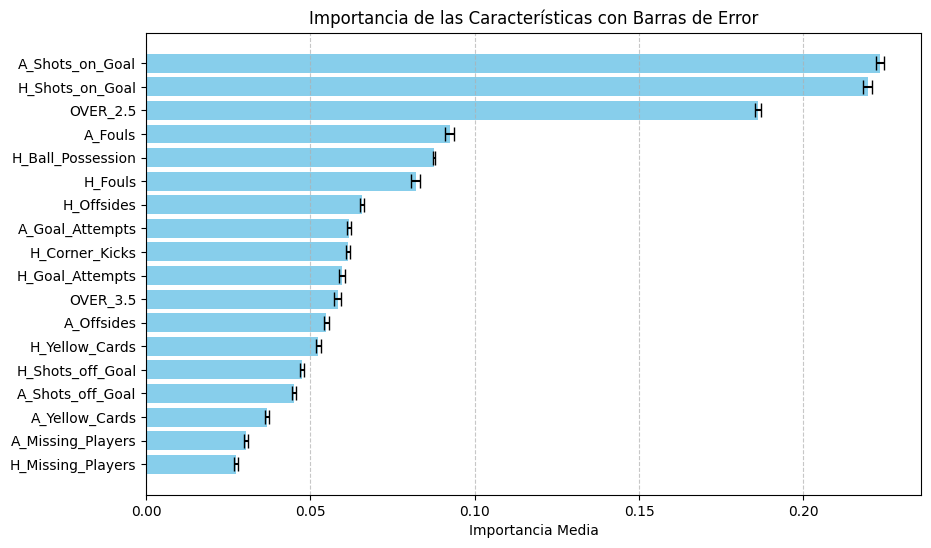

In [36]:
from sklearn.inspection import permutation_importance

# Calcular la importancia de características basada en permutación
result = permutation_importance(best_model_rf, X, y, n_repeats=10, random_state=42, scoring='accuracy')

# Ordenar características por su importancia media
sorted_idx = result.importances_mean.argsort()[::-1]
features = X.columns[sorted_idx]
importances_mean = result.importances_mean[sorted_idx]
importances_std = result.importances_std[sorted_idx]

# Crear el gráfico de barras horizontales con error
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances_mean, xerr=importances_std, align='center', color='skyblue', ecolor='black', capsize=5)
plt.yticks(range(len(features)), features)
plt.gca().invert_yaxis()  # Invertir para que la característica más importante esté arriba
plt.xlabel("Importancia Media")
plt.title("Importancia de las Características con Barras de Error")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



Como podemos observar en el este gráfico, los parametros mas significativos son los tiros a puerta. Tras estos, el parametro $\textit{OVER\_2.5}$, indicador de si hay mas de 2 goles por encuentro, tiene tambien una alta relavancia en el modelo. A partir de ahi, las faltas de ambos equipos y la posesion de balon son otros de los parametros que mas afectan en la clasificacion.

Aunque no nos resulta raro ver las metricas de tiros a puerta en primera posición, si que es sorprendente que el numero de oportunidades de gol no tenga más impacto. Esto puede deberse a que, en el futbol, es más importante la calidad que la cantidad en las ocasiones de gol. No es para nada extraño ver a equipos que controlan el juego, atacan continuamente sin demasiado peligro y pocas veces llegan a rematar a porteria. Por ello, estos resultados nos invitan a darle mayor importancia al disparo a puerta, a finalizar jugadas. De todas formas, los parametros de disparos fuera son de los menos importantes, por lo que no debemos recomendar el disparar en cualquier situación de juego, sino en aquellas con ciertas garantias de que almenos los disparos iran dirigidos a porteria. 

Obviamente el juego es mucho más complejo que esto, y deberian de analizarse muchas mas casuisticas, pero dada la dimension de este analisis, creo que estas son interpretaciones concruentes a los resultados mostrados.

Vamos a contrastar estos resultados con una nueva métrica, quiza las más popular en la actualidad: $\textit{SHAP values}$

Los SHAP values son una metrica que se calcula considerando las posibles conbinaciones de parametros predictores y evaluando su contribucion al modelo final. Prviene de la rama de Teoria de Juegos, y se calcula a partir de los valores de $\textit{Shapley}$:

$$ \phi_i(f) = \sum_{S \subseteq N \setminus \{i\}} \frac{|N|!}{|S|!(|N| - |S| - 1)!} \left[ f(S \cup \{x_i\}) - f(S) \right] $$


Donde:
$$
- \text{N es el conjunto total de características.} \\
- S \text{ es un subconjunto de características que no incluye a } x_i. \\
- f(S) \text{ es la predicción del modelo cuando se utiliza el subconjunto } S \text{ de características.} \\
- f(S \cup \{x_i\}) \text{ es la predicción del modelo cuando se utiliza el subconjunto } S \text{ más la característica } x_i. \\
- \frac{|N|!}{|S|!(|N| - |S| - 1)!} \text{ es un factor de ponderación que ajusta la importancia de cada subconjunto de características.}
$$


In [ ]:
import shap
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear un explainer SHAP
explainer = shap.Explainer(best_model_rf, X_train, feature_perturbation="interventional")

# Calcular valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)  # Devuelve los SHAP values para cada clase

# Gráfico resumen para todas las clases
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Gráfico resumen para una clase específica (por ejemplo, clase 0)
shap.summary_plot(shap_values[:, :, 0], X_test, show=False)  # Cambia el índice para otras clases


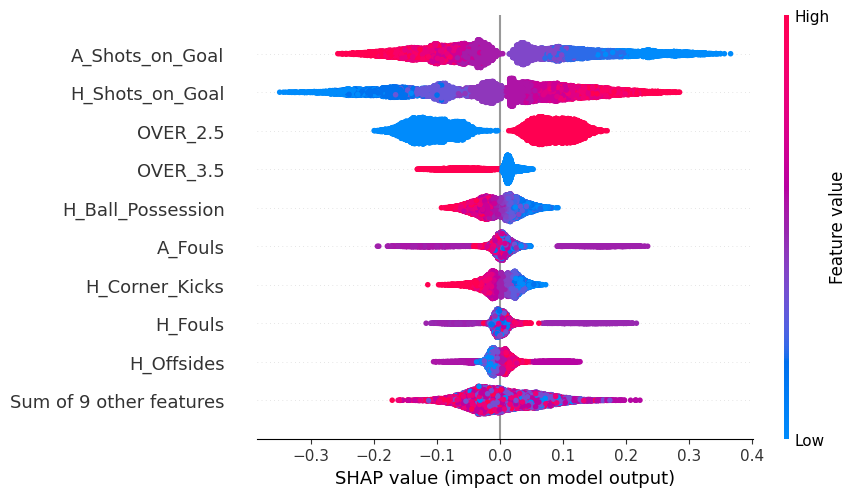

In [59]:
shap.plots.beeswarm(shap_values[:, :,0])


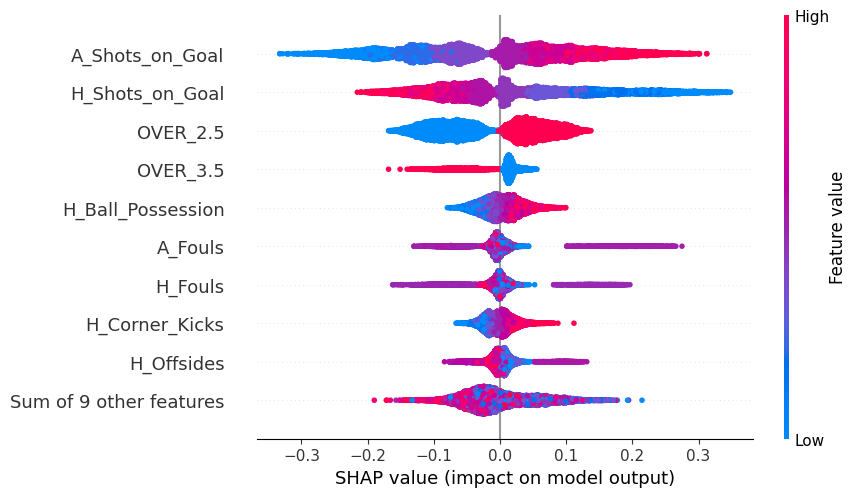

In [60]:
shap.plots.beeswarm(shap_values[:, :,1])

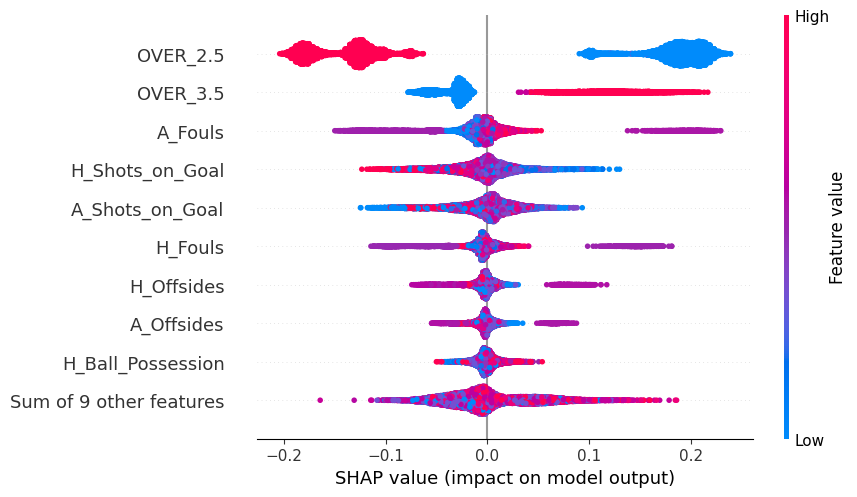

In [61]:
shap.plots.beeswarm(shap_values[:, :,2])

## Comparativa estadistica de modelos

Para finalizar con el análisis, vamos a comparar estadisticamente los modelos aplicados a los dos conjuntos de datos. De esta forma, podremos justificar estadisticamente la eleccion final de nuestro modelo. Esto podria parecer no necesario, ya que ya hemos hecho de cierto modo una comparativa entre los modelos, haciendo uso de la metrica de evaluación $\textit{Accuracy}$. Sin embargo, esta metrica es el resultado de hacer la media de las distintas evaluaciones en el proceso de entrenamiento, y por tanto, no estamos teniendo en cuenta factores como la consistencia del modelo. Por tanto, vamos a comparar los errores de nuestros modelos con el objetivo de fundamentar nuestra eleccion final.

Primero, recogemos los resultados de los 3 modelos aplicados a los dos conjuntos de datos.

In [75]:
df = pd.DataFrame({'Decision Tree':[0.6465, 0.6240], 'Random Forest':[0.8814, 0.7743], 'XGBoost':[0.7039, 0.6710]})
df

,Decision Tree,Random Forest,XGBoost
0,0.6465,0.8814,0.7039
1,0.6240,0.7743,0.6710


Luego, aplicamos el test de Friedman:
- Hipótesis nula $H_0$: Todos los clasificadores tienen un rendimiento similar.
- Hipótesis alternativa $H_1$: Existe al menos un par de clasificadores con rendimientos significativamente diferentes.

El estadístico empleado para este test se calcula:

$$
Q = \frac{12}{n \cdot k (k+1)} \sum_{j=1}^k R_j^2 - 3n(k+1)
$$

donde:  
- $ n $: Número de bloques (filas).  
- $ k $: Número de métodos (columnas).  
- $ R_j $: Suma de los rangos del método $ j $. $R_j = \sum_{i=1}^n r_{ij}$
- $ r_{ij} $ es el rango del método $ j $ en el bloque $ i $

En el caso de obtener un p-valor inferior a 0.05, podremos rechazar la hipotesis nula, y por lo tanto, suponer que existen diferencias significativas entre almenos dos modelos.
En ese caso, se realizara un segundo test, el test de Nemenyi, para identificar diferencias entre pares de modelos.


In [53]:
from scipy.stats import friedmanchisquare
# pip install scikit-posthocs
import scikit_posthocs as sp

stat, p_value = friedmanchisquare(*[df[col] for col in df.columns])

print(f'Estadístico de Friedman: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print("Hay diferencias significativas entre los modelos.")
    
    nemenyi_result = sp.posthoc_nemenyi_friedman(df.values)
    print(nemenyi_result)

else:
    print("No hay diferencias significativas entre los modelos.")

Estadístico de Friedman: 4.0
Valor p: 0.1353352832366127
No hay diferencias significativas entre los modelos.


Los resultados del test de Friedman nos dicen que no existen diferencias significativas entre los modelos. Aun asi, como estos resultados van en contra de lo que nos dice la intuicion, con una diferencia tan grande en los niveles de accuracy de los modelos, vamos a comparar dos de los modelos empleados, y veamos si esta comparativa nos da un resultado diferente.

Para ello, primero comprobaremos si la diferencia entre los errores obtenidos con ambos modelos sigue una distribución normal, mediante el test de $\textit{Shapiro-Wilk}.

- $ H_0 $: La muestra proviene de una población con distribución normal.
- $ H_1 $: La muestra no proviene de una población con distribución normal. 

Con el estadistico:

$$W = \frac{\left( \sum_{i=1}^n a_i x_{(i)} \right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

Donde:
- $ n $: Tamaño de la muestra.
- $ x_{(i)} $: Datos ordenados de menor a mayor.
- $ \bar{x} $: Media muestral.
- $ a_i $: Coeficientes calculados a partir de los valores esperados y la matriz de covarianza de una distribución normal.


In [69]:

X = df1.drop(columns=['Result'])
y = df1['Result']

# Definir el clasificador y el espacio de búsqueda
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
param_dist = {
    'max_depth': randint(3, 20),  # Puedo probar entre 3 y None, sin límite superior para max_depth
    'min_samples_split': randint(10, 100),  # Rango de 2 a 20 para el mínimo de muestras para dividir
    'min_samples_leaf': randint(5, 20),  # Rango de 1 a 20 para el mínimo de muestras para la hoja
    'criterion': ['gini', 'entropy']
}


# Configurar GridSearchCV con validación cruzada estratificada
grid_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=20, # Número de combinaciones aleatorias a probar
    scoring='accuracy',  # Puedes usar otras métricas como accuracy, precision, recall
    cv=StratifiedKFold(n_splits=50, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=40
)

# Ajustar el GridSearch
grid_search.fit(X, y)

results = grid_search.cv_results_

# Calcular los errores por pliegue para el mejor modelo
best_index = grid_search.best_index_
errors_per_fold_dt = []

# Extraemos las métricas de validación cruzada por pliegue
for i in range(grid_search.cv.n_splits):  # Número de divisiones del StratifiedKFold
    mean_accuracy = results[f'split{i}_test_score'][best_index]
    errors_per_fold_dt.append(1 - mean_accuracy)

# Imprimir los errores de cada pliegue
print("\nErrores en cada pliegue para el mejor modelo:")
print(np.round(errors_per_fold_dt, 4))


# Definir el clasificador y el espacio de búsqueda
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_dist = {
    'n_estimators': randint(50,300),  # Número de árboles en el bosque
    'max_depth': randint(3, 20),  # Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),  # Muestras mínimas para dividir un nodo
    'min_samples_leaf': randint(1, 10),  # Muestras mínimas en una hoja
    'criterion': ['gini', 'entropy'],  # Función de calidad del split
    'max_features': ['sqrt', 'log2', None]  # Selección de características
}

# Configurar RandomizedSearchCV con validación cruzada estratificada
grid_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones aleatorias a probar
    scoring='accuracy',  # Puedes usar otras métricas como precision, recall, f1
    cv=StratifiedKFold(n_splits=50, shuffle=True, random_state=42),
    verbose=3,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=40
)

# Ajustar el RandomizedSearch
grid_search.fit(X, y)

# Calcular los errores por pliegue para el mejor modelo
best_index = grid_search.best_index_
errors_per_fold_rf = []

# Extraemos las métricas de validación cruzada por pliegue
for i in range(grid_search.cv.n_splits):  # Número de divisiones del StratifiedKFold
    mean_accuracy = results[f'split{i}_test_score'][best_index]
    errors_per_fold_rf.append(1 - mean_accuracy)

# Imprimir los errores de cada pliegue
print("\nErrores en cada pliegue para el mejor modelo:")
print(np.round(errors_per_fold_rf, 4))


Fitting 50 folds for each of 20 candidates, totalling 1000 fits

Errores en cada pliegue para el mejor modelo:
[0.3815 0.4215 0.3922 0.398  0.3961 0.4166 0.4098 0.4244 0.3863 0.3922
 0.4117 0.3902 0.3912 0.4049 0.4029 0.362  0.3824 0.398  0.4088 0.4098
 0.3737 0.4068 0.399  0.4059 0.4059 0.3789 0.4102 0.4141 0.4033 0.3633
 0.3867 0.3975 0.3887 0.417  0.4268 0.4072 0.4131 0.375  0.3994 0.3662
 0.3828 0.3867 0.3945 0.3682 0.3721 0.3828 0.415  0.4004 0.4219 0.3887]
Fitting 50 folds for each of 10 candidates, totalling 500 fits

Errores en cada pliegue para el mejor modelo:
[0.3912 0.4    0.4205 0.3971 0.4059 0.4341 0.4459 0.398  0.3922 0.3893
 0.398  0.3912 0.401  0.4107 0.3941 0.4078 0.4068 0.4088 0.4107 0.4215
 0.401  0.4117 0.4156 0.4146 0.402  0.3916 0.4424 0.3906 0.4092 0.4033
 0.3857 0.4131 0.3926 0.4229 0.4238 0.3936 0.4189 0.3682 0.3945 0.3896
 0.3848 0.3994 0.3916 0.4004 0.3936 0.3887 0.4209 0.4199 0.4268 0.3857]


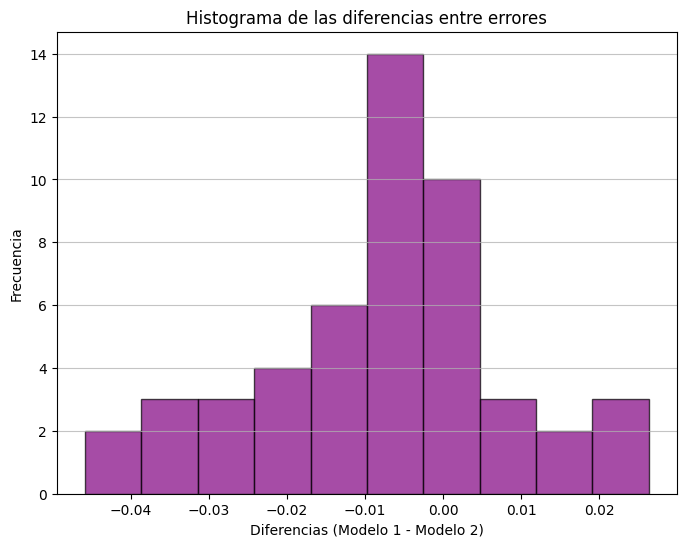

Shapiro-Wilk Test: Estadístico = 0.980, p-valor = 0.559


In [71]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
# Calcular diferencias
differences = np.array(errors_per_fold_dt) - np.array(errors_per_fold_rf)

# Test de normalidad: Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(differences)

# Configuración del histograma
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=10, alpha=0.7, color="purple", edgecolor="black")
plt.title("Histograma de las diferencias entre errores")
plt.xlabel("Diferencias (Modelo 1 - Modelo 2)")
plt.ylabel("Frecuencia")
plt.grid(axis="y", alpha=0.75)
plt.show()

# Resultados
# print(f"Diferencias entre errores: {differences}")
print(f"Shapiro-Wilk Test: Estadístico = {shapiro_stat:.3f}, p-valor = {shapiro_p:.3f}")

El p-valor es mayor a 0.05, y por lo tanto, rechazamos la hipotesis nula. En consecuencia, podemos asumir normalidad en nuestros datos.

Por ello, podemos realizar un t-test para comparar ambos modelos.


El test t de Student es una prueba paramétrica que se usa para comparar las medias de dos grupos independientes, evaluando si son significativamente diferentes.

- $ H_0 $: Las medias de las dos muestras son iguales. Es decir, no hay diferencia significativa entre los grupos.
- $ H_1 $: Las medias de las dos muestras son diferentes. Es decir, hay una diferencia significativa entre los grupos.


El estadístico $ t $ se calcula de la siguiente manera:


$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

donde:

- $ \bar{X}_1 $ y $ \bar{X}_2 $ son las medias de las dos muestras.
- $ s_1^2 $ y $ s_2^2 $ son las varianzas de las dos muestras.
- $ n_1 $ y $ n_2 $ son los tamaños de las dos muestras.

In [76]:
from scipy.stats import ttest_ind

# Prueba t para muestras independientes
stat, p_value = ttest_ind(errors_per_fold_dt, errors_per_fold_rf, alternative='two-sided')

# Resultados
print(f"Estadístico t: {stat:.3f}")
print(f"p-valor: {p_value:.3f}")

if p_value < 0.05:
    print("Las distribuciones son significativamente diferentes (rechazamos H₀).")
else:
    print("No hay evidencia suficiente para afirmar que las distribuciones son diferentes (no rechazamos H₀).")


Estadístico t: -2.419
p-valor: 0.017
Las distribuciones son significativamente diferentes (rechazamos H₀).


Segun el resultado del t-test, los resultados de los modelos son significativamente diferentes.

C:\Users\irait\AppData\Local\Temp\ipykernel_13044\847702459.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errors_per_fold_dt, shade=True, color="blue", label="Decision Tree")
C:\Users\irait\AppData\Local\Temp\ipykernel_13044\847702459.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errors_per_fold_rf, shade=True, color="purple", label="Random Forest")


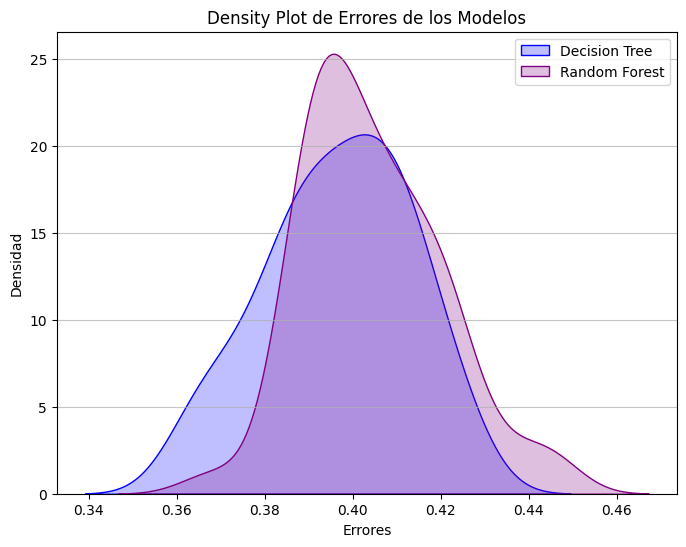

In [73]:
import seaborn as sns

# Primer gráfico de densidad: Modelo 1
plt.figure(figsize=(8, 6))

# Graficar la densidad del Modelo 1
sns.kdeplot(errors_per_fold_dt, shade=True, color="blue", label="Decision Tree")

# Graficar la densidad del Modelo 2
sns.kdeplot(errors_per_fold_rf, shade=True, color="purple", label="Random Forest")

# Títulos y etiquetas
plt.title("Density Plot de Errores de los Modelos")
plt.xlabel("Errores")
plt.ylabel("Densidad")

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(axis="y", alpha=0.75)
plt.show()